# Leopard challenge: Regression

## Загрузка данных
#### Данные беру из leopard-challenge-regression.zip

https://drive.google.com/file/d/19AlSgbp2_9mkLSaxrnVVQOicJ105V_B8/view?usp=sharing

# Colab

In [1]:
! gdown --id 19AlSgbp2_9mkLSaxrnVVQOicJ105V_B8

"gdown" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


! unzip /content/leopard-challenge-regression.zip -d /content/leopard_challenge_regression/

In [9]:
! unzip / content / leopard-challenge-regression.zip -d / content / leopard_challenge_regression /

"unzip" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [32]:
import pandas as pd

In [1]:
train = pd.read_csv('/content/leopard_challenge_regression/train.csv')

NameError: name 'pd' is not defined

In [1]:
train.head()

NameError: name 'train' is not defined

In [ ]:
!pip install phik

!pip install feature_engine

!pip install catboost

# Pycharm

In [1]:
from zipfile import ZipFile

with ZipFile('leopard-challenge-regression.zip', 'r') as zf:
    zf.extractall()

# 1. Задача

Даны данные о ценах на недвижимость в Мельбурне.
Каждая строчка в датасете - какой-то объект недвижимости, по которому известны некоторые его параметры и его цена.
**Задача:** по параметрам определить цену объекта.

# 2. Импорт библиотек

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import phik
import folium
from feature_engine.selection import SmartCorrelatedSelection
from feature_engine.imputation import RandomSampleImputer
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor, Pool, cv
import joblib
import warnings
warnings.filterwarnings("ignore")

# plt.style.use('dark_background')
plt.style.use('seaborn-colorblind')
pd.set_option('display.max_columns', 100)

# 3. Загрузка Датасета

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,id
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,34302
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,33247
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,31886
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0,18999
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,16809


In [4]:
df.shape

(18373, 22)

In [5]:
df_test = pd.read_csv('test.csv')

In [6]:
df_test.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,id
0,Abbotsford,513/6 Acacia Pl,3,u,S,Dingle,7/10/2017,3.0,3067.0,NaN,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0,30130
1,Abbotsford,60 Charles St,3,h,S,Jellis,7/10/2017,3.0,3067.0,3.0,1.0,NaN,192.0,109.0,1900.0,Yarra City Council,-37.80792,144.99508,Northern Metropolitan,4019.0,18311
2,Abbotsford,38 Studley St,3,h,S,Nelson,7/10/2017,3.0,3067.0,3.0,1.0,1.0,159.0,93.0,1890.0,Yarra City Council,-37.80124,144.99459,Northern Metropolitan,4019.0,18934
3,Airport West,18 Glenys Av,3,h,S,Raine,7/10/2017,10.4,3042.0,3.0,1.0,5.0,536.0,108.0,1980.0,Moonee Valley City Council,-37.72285,144.87539,Western Metropolitan,3464.0,1824
4,Airport West,35 Thomas St,3,h,S,Nelson,7/10/2017,10.4,3042.0,3.0,1.0,1.0,NaN,130.0,2009.0,Moonee Valley City Council,-37.71754,144.87704,Western Metropolitan,3464.0,31339


In [7]:
df_test.shape

(8818, 21)

# 4. Получение информации о Датасете

## 4.1 Подготовка таблиц

#### Перевод названия колонок в строчные буквы

In [8]:
df.columns = df.columns.str.lower()
df_test.columns = df_test.columns.str.lower()

#### Перевод даты в datetime

In [9]:
df.date = pd.to_datetime(df.date, format='%d/%m/%Y')
df_test.date = pd.to_datetime(df_test.date, format='%d/%m/%Y')

## 4.2 Основная информация о датасете

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18373 entries, 0 to 18372
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   suburb         18373 non-null  object        
 1   address        18373 non-null  object        
 2   rooms          18373 non-null  int64         
 3   type           18373 non-null  object        
 4   price          18373 non-null  float64       
 5   method         18373 non-null  object        
 6   sellerg        18373 non-null  object        
 7   date           18373 non-null  datetime64[ns]
 8   distance       18373 non-null  float64       
 9   postcode       18373 non-null  float64       
 10  bedroom2       14905 non-null  float64       
 11  bathroom       14903 non-null  float64       
 12  car            14798 non-null  float64       
 13  landsize       13579 non-null  float64       
 14  buildingarea   7750 non-null   float64       
 15  yearbuilt      8944

**Обучающая таблица состоит из:** 18373 строк и 22 столбцов

In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8818 entries, 0 to 8817
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   suburb         8818 non-null   object        
 1   address        8818 non-null   object        
 2   rooms          8818 non-null   int64         
 3   type           8818 non-null   object        
 4   method         8818 non-null   object        
 5   sellerg        8818 non-null   object        
 6   date           8818 non-null   datetime64[ns]
 7   distance       8817 non-null   float64       
 8   postcode       8817 non-null   float64       
 9   bedroom2       5858 non-null   float64       
 10  bathroom       5854 non-null   float64       
 11  car            5582 non-null   float64       
 12  landsize       4365 non-null   float64       
 13  buildingarea   2882 non-null   float64       
 14  yearbuilt      3112 non-null   float64       
 15  councilarea    8816 n

**Тестовая таблица состоит из:** 8818 строк и 21 столбца

## 4.3 Пропущенные значения

In [12]:
df.isna().mean().sort_values(ascending=False)

buildingarea     0.578185
yearbuilt        0.513199
landsize         0.260926
car              0.194579
bathroom         0.188864
bedroom2         0.188755
longtitude       0.181353
lattitude        0.181353
propertycount    0.000054
regionname       0.000054
councilarea      0.000054
suburb           0.000000
address          0.000000
postcode         0.000000
distance         0.000000
date             0.000000
sellerg          0.000000
method           0.000000
price            0.000000
type             0.000000
rooms            0.000000
id               0.000000
dtype: float64

In [13]:
df_test.isna().mean().sort_values(ascending=False)

buildingarea     0.673169
yearbuilt        0.647086
landsize         0.504990
car              0.366977
bathroom         0.336131
bedroom2         0.335677
longtitude       0.330007
lattitude        0.330007
propertycount    0.000227
regionname       0.000227
councilarea      0.000227
distance         0.000113
postcode         0.000113
suburb           0.000000
address          0.000000
date             0.000000
sellerg          0.000000
method           0.000000
type             0.000000
rooms            0.000000
id               0.000000
dtype: float64

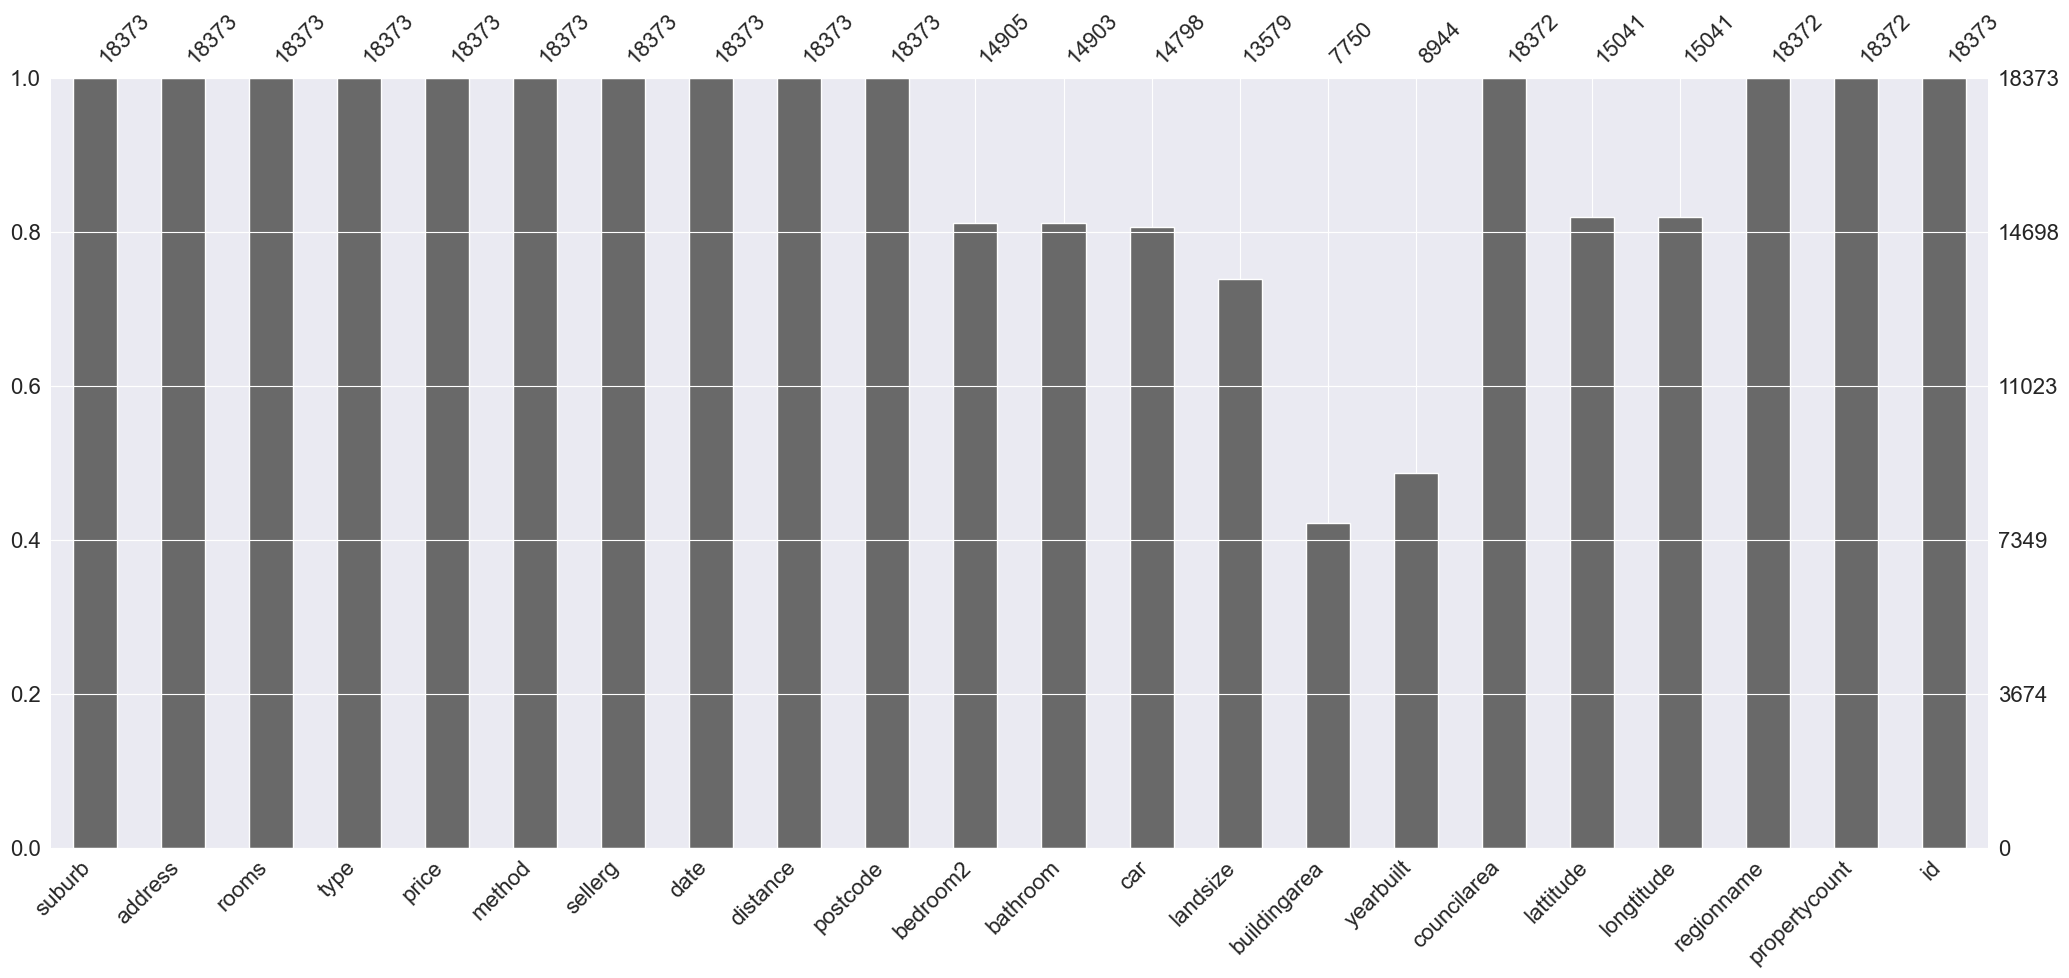

In [14]:
msno.bar(df);

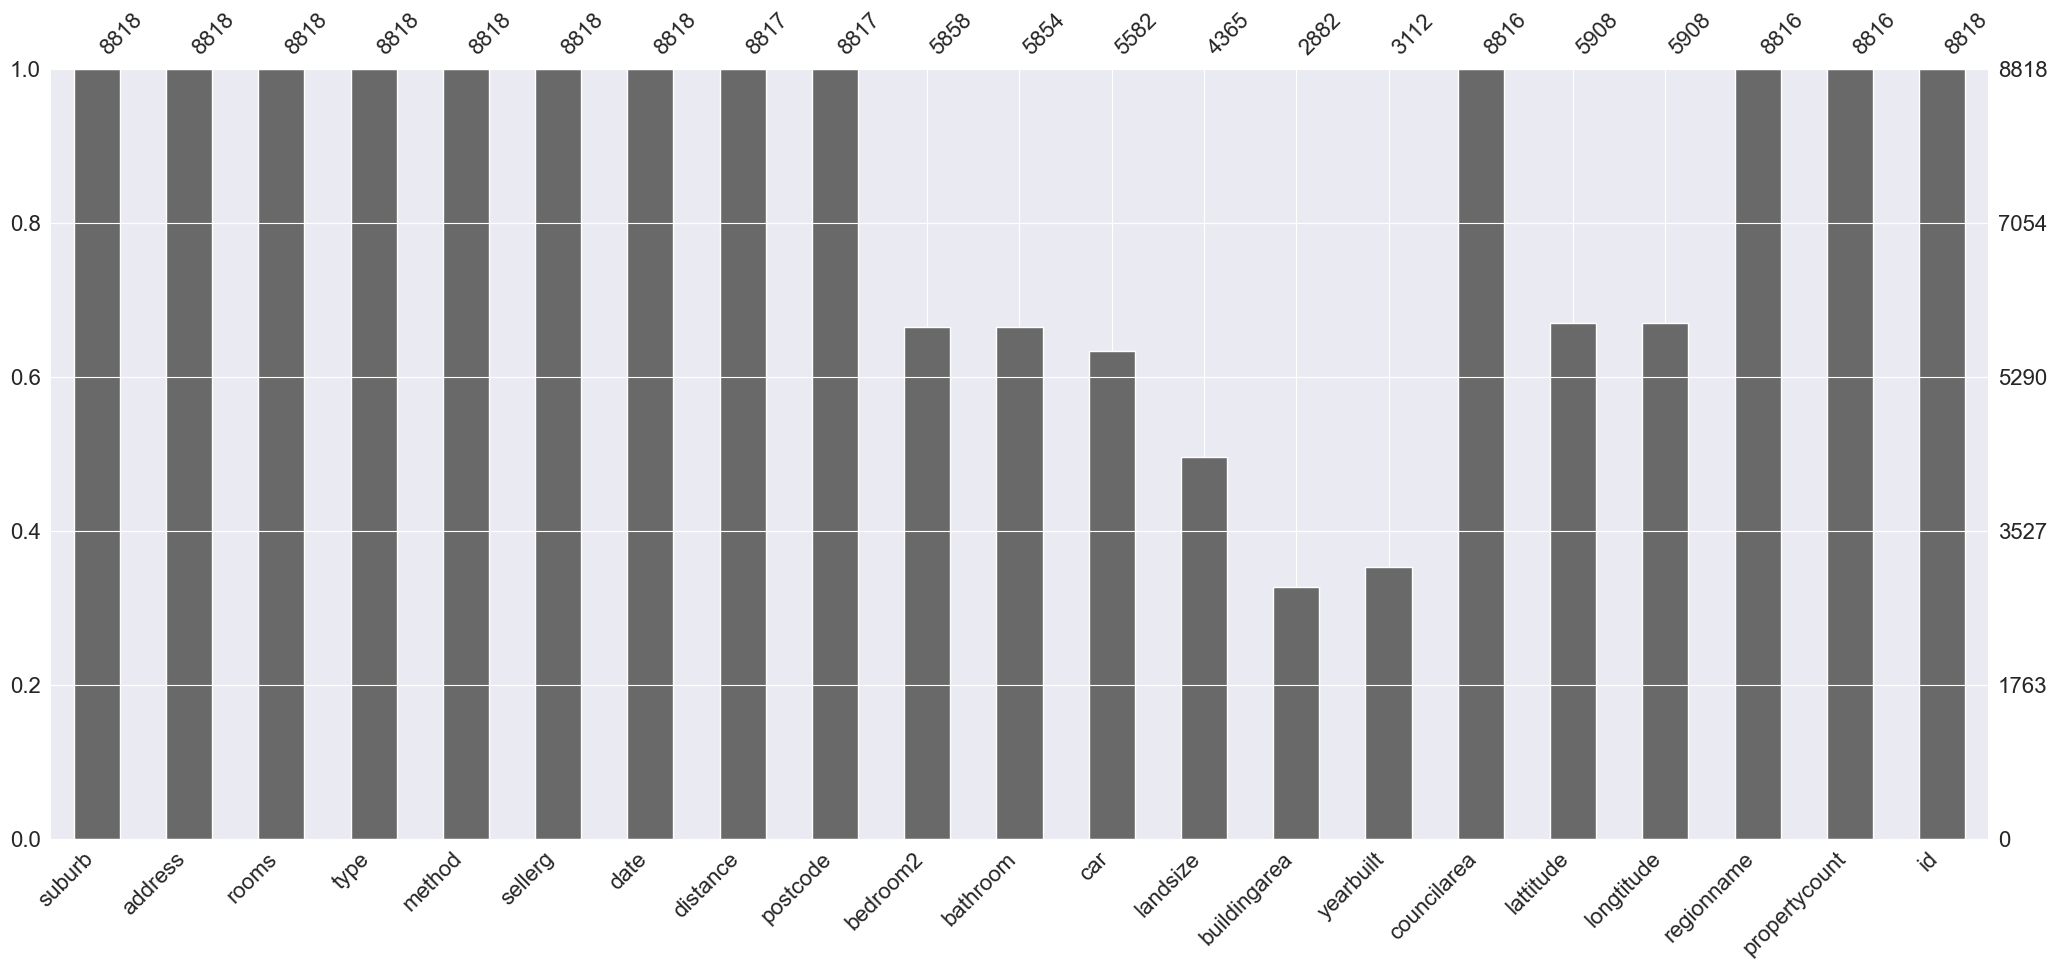

In [15]:
msno.bar(df_test);

**Пропущенные значения находятся в столбцах:** bedroom2, bathroom, car, landsize, buildingarea, yearbuilt, councilarea, lattitude, longtitude, regionname, propertycount.

## 4.4 Дубликаты

In [16]:
df.duplicated().sum()

0

In [17]:
df_test.duplicated().sum()

0

**Дубликаты отсутствуют!**

## 4.5 Числовые переменные

In [18]:
df.describe()

,rooms,price,distance,postcode,bedroom2,bathroom,car,landsize,buildingarea,yearbuilt,lattitude,longtitude,propertycount,id
count,18373.000000,1.837300e+04,18373.000000,18373.000000,14905.000000,14903.000000,14798.000000,13579.000000,7750.000000,8944.000000,15041.000000,15041.000000,18372.000000,18373.000000
mean,2.936592,1.053235e+06,10.403962,3107.258314,2.914928,1.538683,1.617313,558.937403,151.133167,1965.925089,-37.809872,144.996486,7518.621489,17490.731889
std,0.955952,6.217973e+05,6.018424,95.285542,0.962743,0.688374,0.957072,3991.516323,519.517626,36.958956,0.081272,0.106536,4487.143499,10075.864589
min,1.000000,2.270000e+05,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000,2.000000
25%,2.000000,6.350000e+05,6.300000,3046.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1950.000000,-37.858180,144.931400,4294.000000,8749.000000
50%,3.000000,8.800000e+05,9.700000,3085.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.803600,145.001100,6567.000000,17497.000000
75%,3.000000,1.301000e+06,13.300000,3149.000000,3.000000,2.000000,2.000000,651.000000,173.862500,2000.000000,-37.756100,145.060190,10331.000000,26286.000000
max,12.000000,5.580000e+06,48.100000,3978.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000,34856.000000


#### Описание числовых переменных
**1.** Минимальная цена продажи - 227 000, Максимальная - 5 580 000, Средняя ≈ 1 053 000, Медианная ≈ 880 000
**2.** Минимальное количество комнат - 1, Максимальное - 12, Среднее и Медианное ≈ 3
**3. Квартиры располагаются в радиусе 48 км от центра:** Минимальное расстояние до центра - 0, Максимальное - 48км, Среднее и Медианное ≈ 10км
**4. Квартиры могут продаваться без спален:** Минимальное кол-во спален - 0, Максимальное - 20, Медианное и Среднее ≈ 3
**5. Квартиры могут продаваться без ванных:** Минимальное кол-во ванных - 0, Максимальное - 8, Среднее - 1.5, Медианное - 1
**6. Квартиры могут продаваться без парковочных мест:** Минимальное кол-во парковок - 0, Максимальное - 10, Среднее - 1.6, Медианное - 2
**7. Объекты могут продаваться без прилегающей территории:** Минимальная прилегающая территория - 0, Максимальная - 433014 м² (**ВЫБРОС!**), Средняя - 558 м², Медианная - 440 м²
**8.** Минимальная жилая площадь - 0 (Возможно студии???), Максимальная ≈ 44000 м² (**ВЫБРОС!!**), Средняя - 151 м², Медианная - 126м
**9.** Минимальный год постройки - 1196 (**ВЫБРОС!!!**), Максимальный - 2018, Средний - 1966, Медианный - 1970

## 4.6 Категориальные переменные

In [19]:
df.describe(include='object').T

,count,unique,top,freq
suburb,18373,329,Reservoir,540
address,18373,18112,28 Blair St,3
type,18373,3,h,12091
method,18373,5,S,12025
sellerg,18373,305,Nelson,2001
councilarea,18372,33,Boroondara City Council,1896
regionname,18372,8,Southern Metropolitan,6326


#### Описание категориальных переменных
**1.** Чаще всего продаются объекты типа h: коттеджи, виллы, дома и т.д.
**2.** Больше всего объектов продаётся в районе Reservoir - 540
**3.** Больше всего объектов продаётся в округе Boroondara City - 1896
**4.** Больше всего объектов продаётся в Административном округе Southern Metropolitan - 6326

# 5. EDA

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18373 entries, 0 to 18372
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   suburb         18373 non-null  object        
 1   address        18373 non-null  object        
 2   rooms          18373 non-null  int64         
 3   type           18373 non-null  object        
 4   price          18373 non-null  float64       
 5   method         18373 non-null  object        
 6   sellerg        18373 non-null  object        
 7   date           18373 non-null  datetime64[ns]
 8   distance       18373 non-null  float64       
 9   postcode       18373 non-null  float64       
 10  bedroom2       14905 non-null  float64       
 11  bathroom       14903 non-null  float64       
 12  car            14798 non-null  float64       
 13  landsize       13579 non-null  float64       
 14  buildingarea   7750 non-null   float64       
 15  yearbuilt      8944

**Построю *scatterplot* для просмотра распределения объектов недвижимости по координатам**

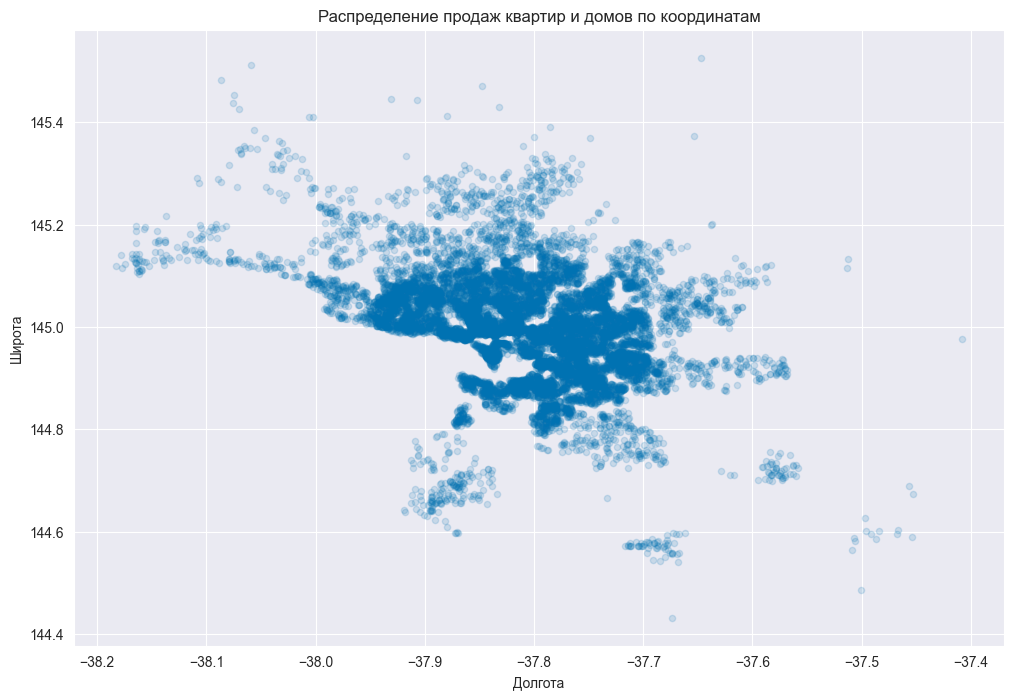

In [21]:
df.plot(kind='scatter', x='lattitude', y='longtitude', alpha=0.15, figsize=(12,8))
plt.title('Распределение продаж квартир и домов по координатам')
plt.xlabel("Долгота")
plt.ylabel("Широта")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


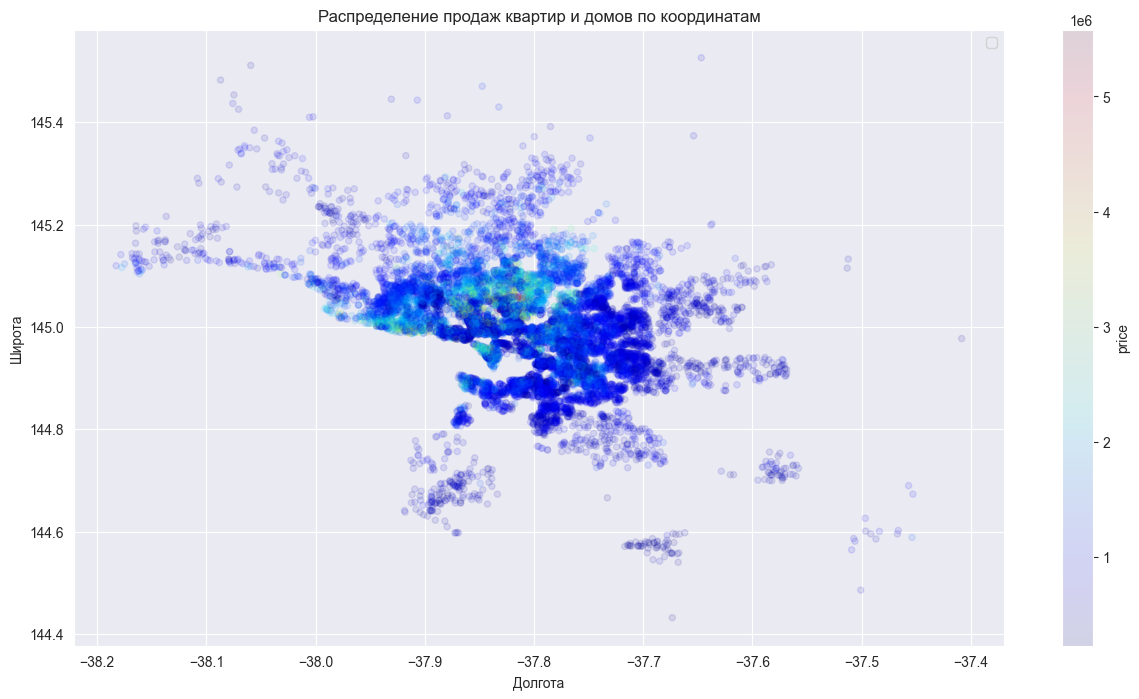

In [22]:
df.plot(kind='scatter', x='lattitude', y='longtitude', alpha=0.1, figsize=(15,8),
       c='price', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()
plt.title('Распределение продаж квартир и домов по координатам')
plt.xlabel("Долгота")
plt.ylabel("Широта")
plt.show()

## Корреляция признаков

In [23]:
corr_matrix = df.corr()
corr_matrix['price'].sort_values(ascending=False)

price            1.000000
rooms            0.499639
bedroom2         0.477260
bathroom         0.463648
car              0.238572
longtitude       0.198808
postcode         0.097487
buildingarea     0.094909
landsize         0.037681
id              -0.004071
propertycount   -0.053093
distance        -0.172521
lattitude       -0.206103
yearbuilt       -0.326959
Name: price, dtype: float64

Посмотрим на признаки, которые больше всего коррелируют с ценой

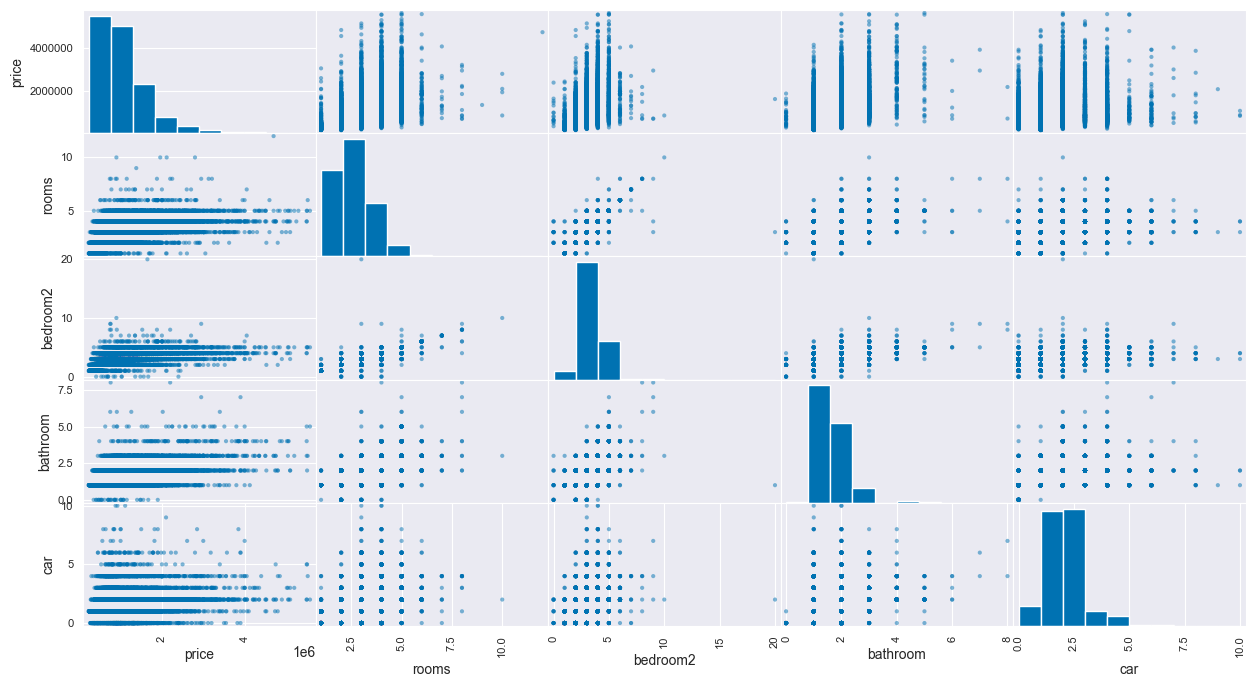

In [24]:
attributes = ['price', 'rooms', 'bedroom2', 'bathroom', 'car']
pd.plotting.scatter_matrix(df[attributes], figsize=(15,8))
plt.show()

Можно заметить зависимость количества спален от количества комнат.
Рассмотрим этот атрибут более подробно

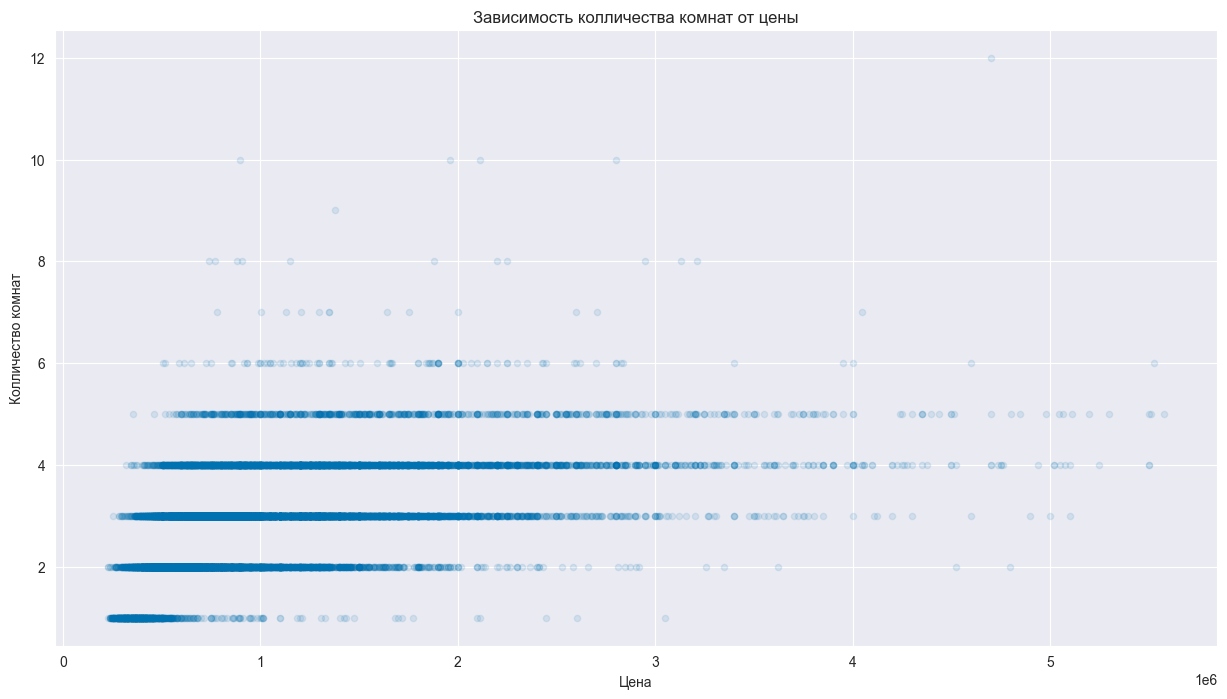

In [25]:
df.plot(kind='scatter', x='price', y='rooms', alpha=0.1, figsize=(15,8))
plt.title('Зависимость колличества комнат от цены')
plt.xlabel("Цена")
plt.ylabel("Колличество комнат")
plt.show()

Оценю зависимости на графике heatmap

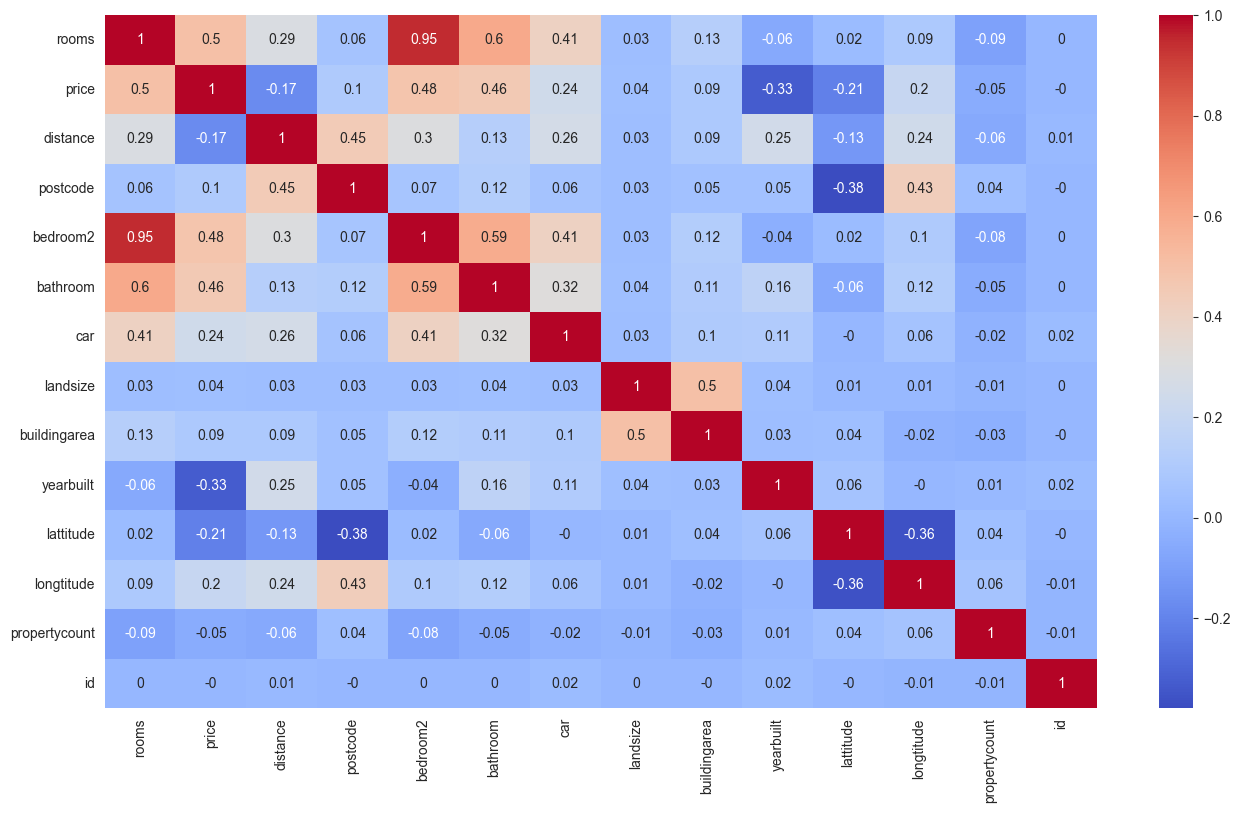

In [26]:
plt.figure(figsize=(16,9))
sns.heatmap(round(df.corr(),2),annot=True,cmap="coolwarm")
plt.show()

Проверка на корреляцию

In [27]:
correlated = SmartCorrelatedSelection(
    variables= None,
    method = 'pearson',
    threshold = 0.8,
    missing_values = 'ignore',
    selection_method = 'variance',
    estimator=None,
    scoring = 'roc_auc',
    cv=5)

correlated.fit(df)

SmartCorrelatedSelection(cv=5, selection_method='variance')

SmartCorrelatedSelection - рекомендует выкинуть столбец ROOMS для меньшей корреляции с другими столбцами.

In [28]:
correlated.features_to_drop_

['rooms']

## Phik взаимосвязь

In [29]:
# Часть от Phik
# df_exp = df.sample(frac=0.2, random_state=42)
# phik_overview = df_exp.phik_matrix()
# phik_overview['price'].round(2).sort_values(ascending=False)

# Phik полностью
# phik_overview = train.phik_matrix()  # 21 минута в colab, 10 минут пк
# phik_overview['price'].round(2).sort_values(ascending=False)

## Количественные признаки

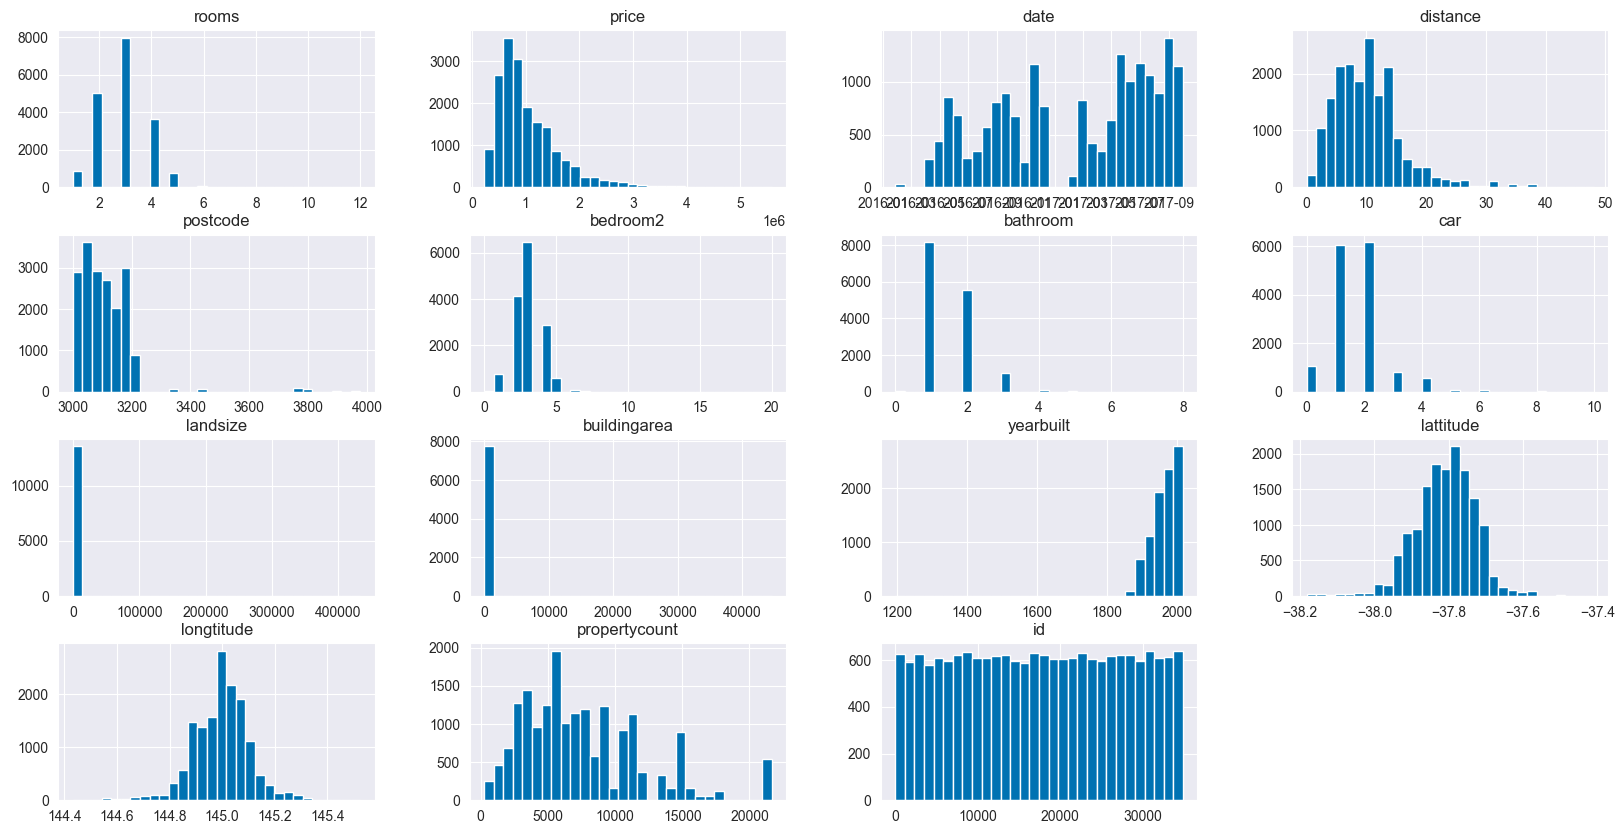

In [30]:
df.hist(figsize = (20, 10), bins = 30, legend = False)
plt.show()

#### Функция гистограммы и описания для количественных признаков

In [31]:
def hist_box_describe_num(ds, x):
    print(ds[x].describe())
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.histplot(data=ds, x=ds[x], kde=True);
    plt.subplot(1,2,2)
    sns.boxplot(data=ds, y=ds[x]);

### Price - Распределение цены

count    1.837300e+04
mean     1.053235e+06
std      6.217973e+05
min      2.270000e+05
25%      6.350000e+05
50%      8.800000e+05
75%      1.301000e+06
max      5.580000e+06
Name: price, dtype: float64


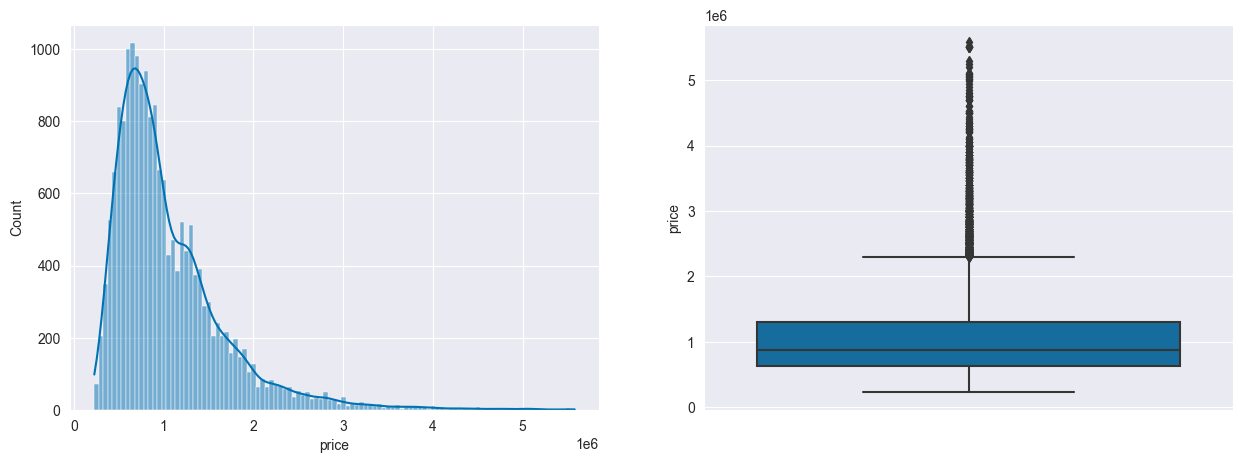

In [32]:
hist_box_describe_num(df, 'price')

Большинство домов оцениваются от 200.000 до 2.2 млн.
Половина всех объектов оценивается от 600 тыс до 1.3 млн

### Rooms - Количество комнат

count    18373.000000
mean         2.936592
std          0.955952
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         12.000000
Name: rooms, dtype: float64


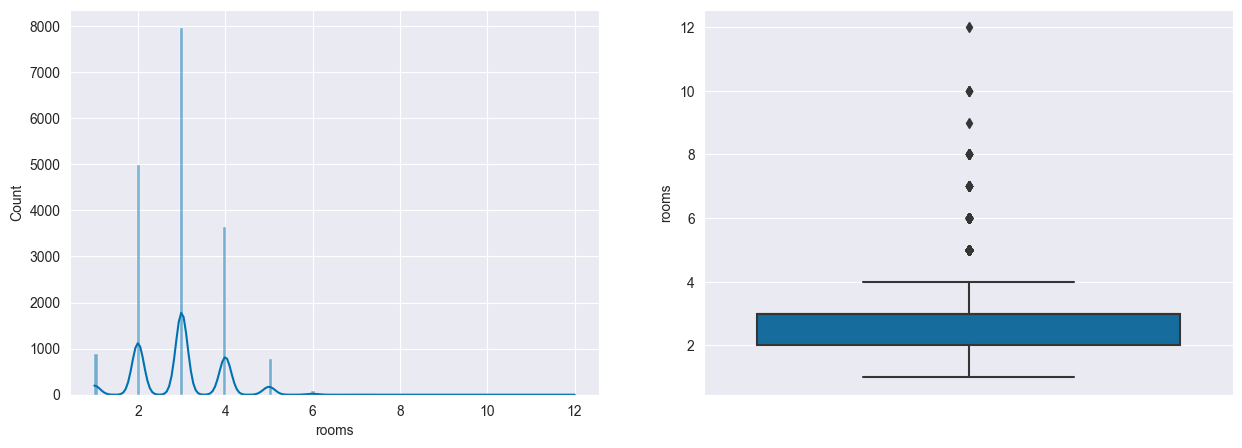

In [33]:
hist_box_describe_num(df, 'rooms')

Большинство домов имеют от 1 до 4 комнат, а в половине объектов от 2 до 3

### Distance - Расстояние до центра

count    18373.000000
mean        10.403962
std          6.018424
min          0.000000
25%          6.300000
50%          9.700000
75%         13.300000
max         48.100000
Name: distance, dtype: float64


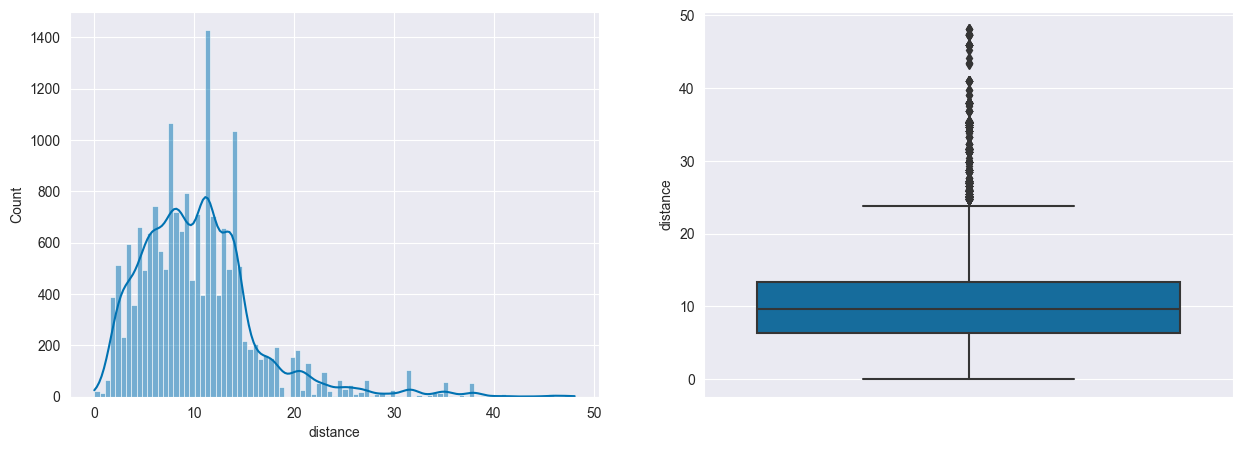

In [34]:
hist_box_describe_num(df, 'distance')

Большинство домов находятся от 0 до 24 км от центра
Получаем, что половина живёт от 6 до 13 км от центра

### Postcode - Почтовый индекс

count    18373.000000
mean      3107.258314
std         95.285542
min       3000.000000
25%       3046.000000
50%       3085.000000
75%       3149.000000
max       3978.000000
Name: postcode, dtype: float64


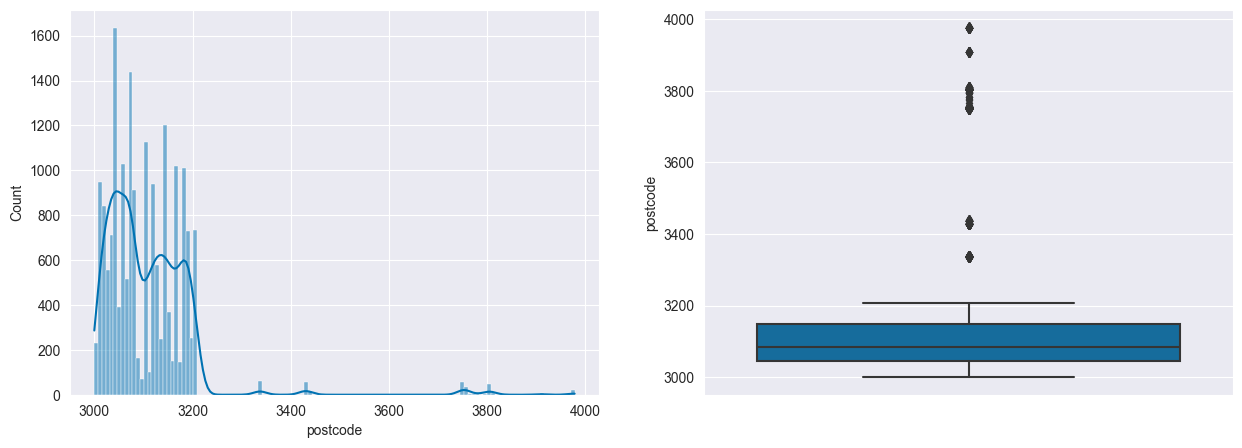

In [35]:
hist_box_describe_num(df, 'postcode')

Большинство почтовых индексов находятся от 3000 до 3200-ого

### Bedroom2 - Количество спален

count    14905.000000
mean         2.914928
std          0.962743
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         20.000000
Name: bedroom2, dtype: float64


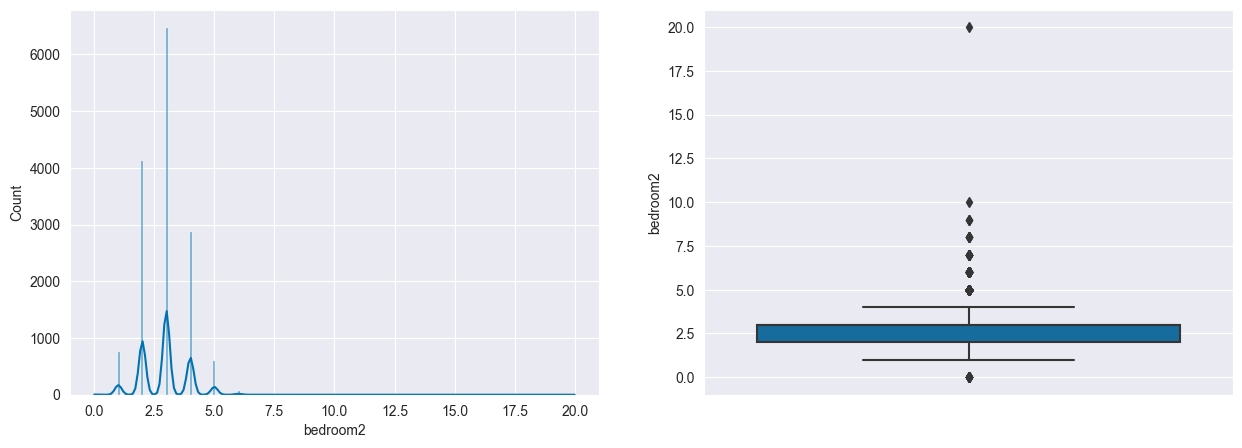

In [36]:
hist_box_describe_num(df, 'bedroom2')

В большинстве домов от 1 до 4 спален

### Bathroom - Количество ванных комнат

count    14903.000000
mean         1.538683
std          0.688374
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          8.000000
Name: bathroom, dtype: float64


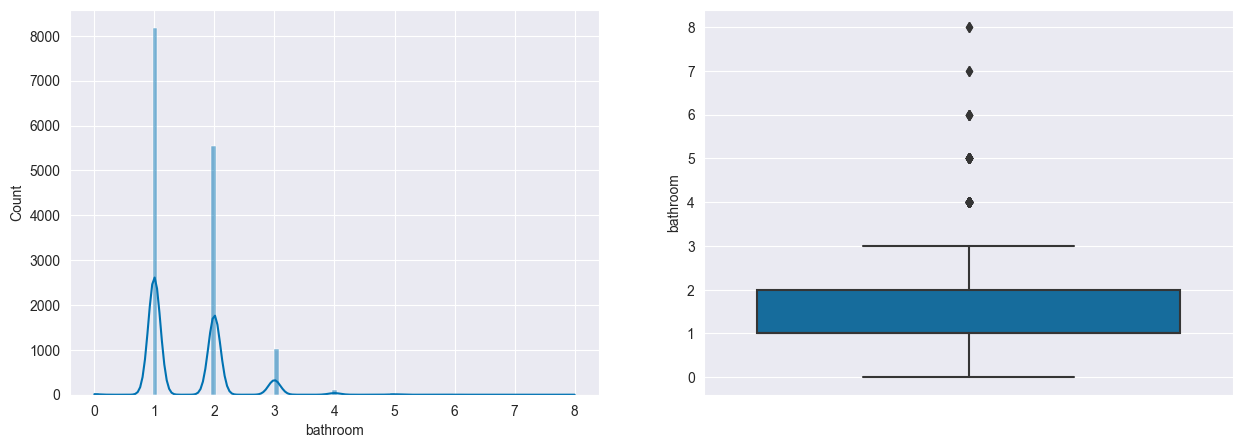

In [37]:
hist_box_describe_num(df, 'bathroom')

Большинство домов имеет от 0 до 3 ванных комнат

### Car - Количество парковочных мест:

count    14798.000000
mean         1.617313
std          0.957072
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         10.000000
Name: car, dtype: float64


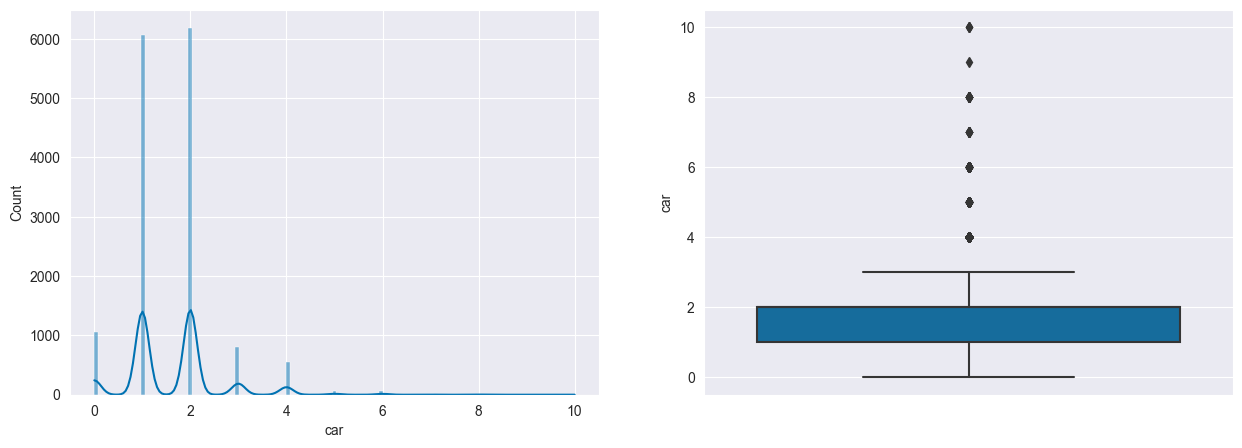

In [38]:
hist_box_describe_num(df, 'car')

**В большинстве домов от 0 до 3 парковочных мест**

### Landsize - Площадь прилегающей территории

count     13579.000000
mean        558.937403
std        3991.516323
min           0.000000
25%         177.000000
50%         440.000000
75%         651.000000
max      433014.000000
Name: landsize, dtype: float64


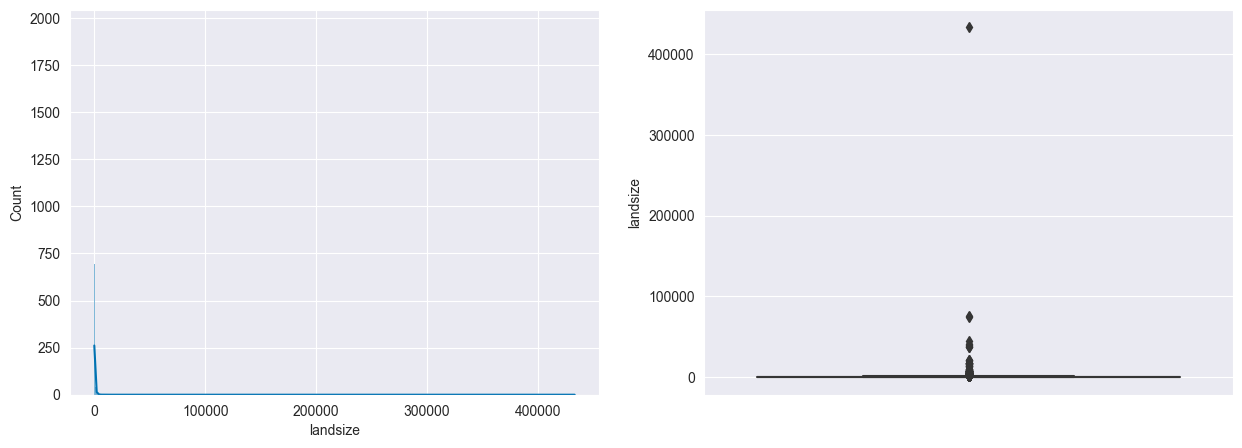

In [39]:
hist_box_describe_num(df, 'landsize')

Есть выбросы
Можно считать выбросами объекты, где прилегающая территория больше 1750. Таких объектов 277, что около 2%.
Посмотрю распределение прилегающей территории без выбросов

count    13301.000000
mean       422.445380
std        301.055625
min          0.000000
25%        172.000000
50%        422.000000
75%        645.000000
max       1730.000000
Name: landsize, dtype: float64


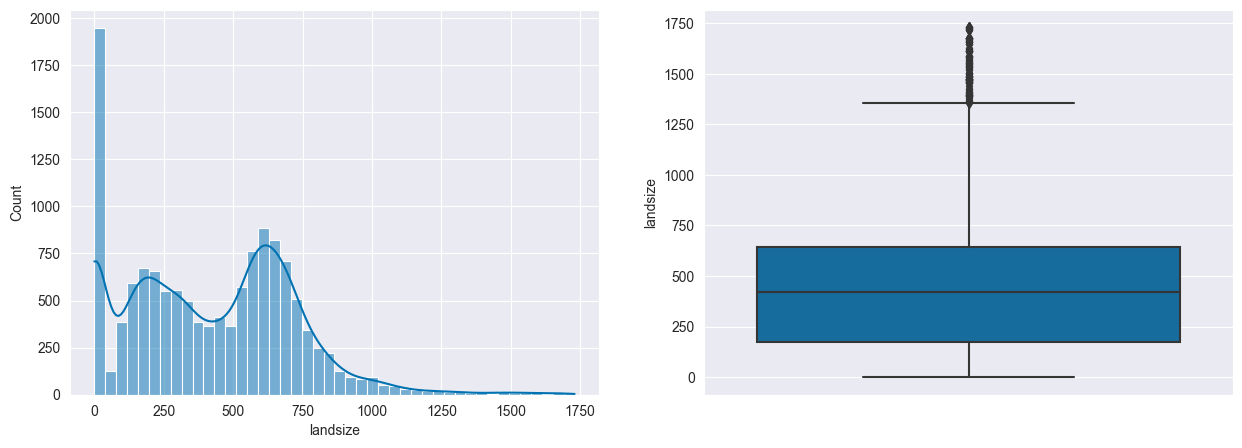

In [40]:
hist_box_describe_num(df.query('landsize < 1750'), 'landsize')

Существует множество домов без прилегающей территории, а так же большинство домов имеет прилегающую территорию от 0 до 1350 м²

### BuildingArea - Площадь дома

count     7750.000000
mean       151.133167
std        519.517626
min          0.000000
25%         93.000000
50%        126.000000
75%        173.862500
max      44515.000000
Name: buildingarea, dtype: float64


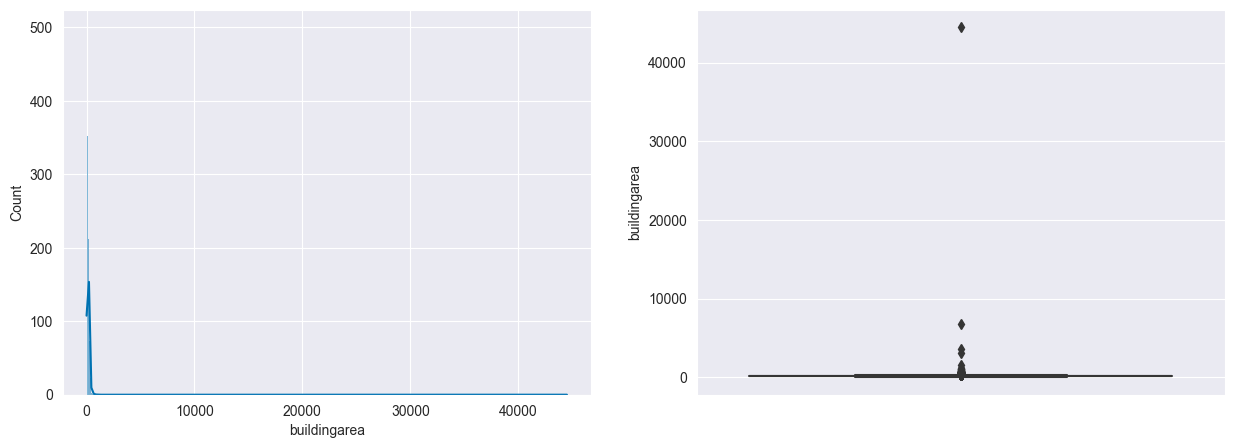

In [41]:
hist_box_describe_num(df, 'buildingarea')

Есть выбросы
Можно считать выбросами объекты, где площадь дома более 600 м². Таких объектов ≈0.5%

count    7713.000000
mean      141.001453
std        75.294717
min         0.000000
25%        92.000000
50%       125.000000
75%       172.000000
max       594.000000
Name: buildingarea, dtype: float64


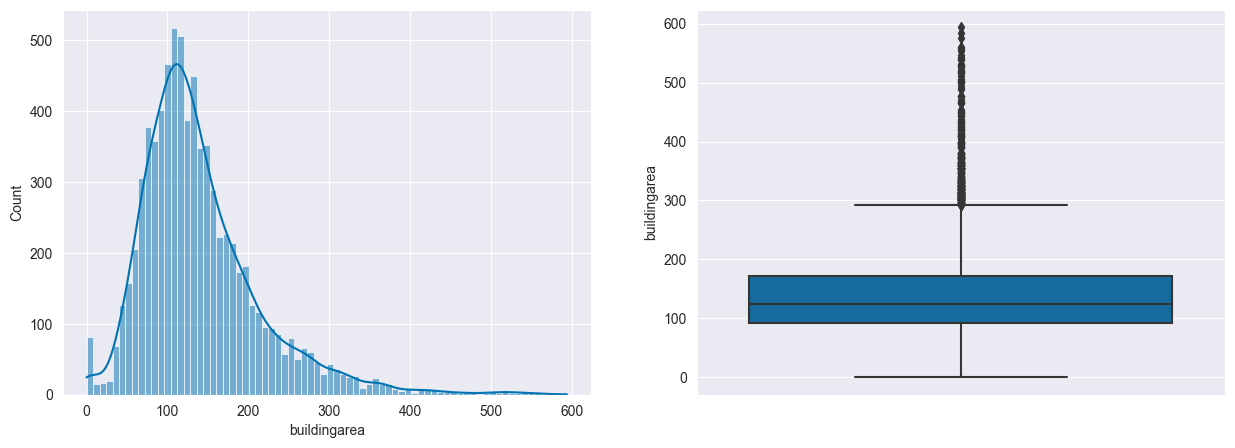

In [42]:
hist_box_describe_num(df.query('buildingarea < 600'), 'buildingarea')

Большинство домов имеют площадь от 0 до 300 м²

### YearBuilt - Год постройки

count    8944.000000
mean     1965.925089
std        36.958956
min      1196.000000
25%      1950.000000
50%      1970.000000
75%      2000.000000
max      2018.000000
Name: yearbuilt, dtype: float64


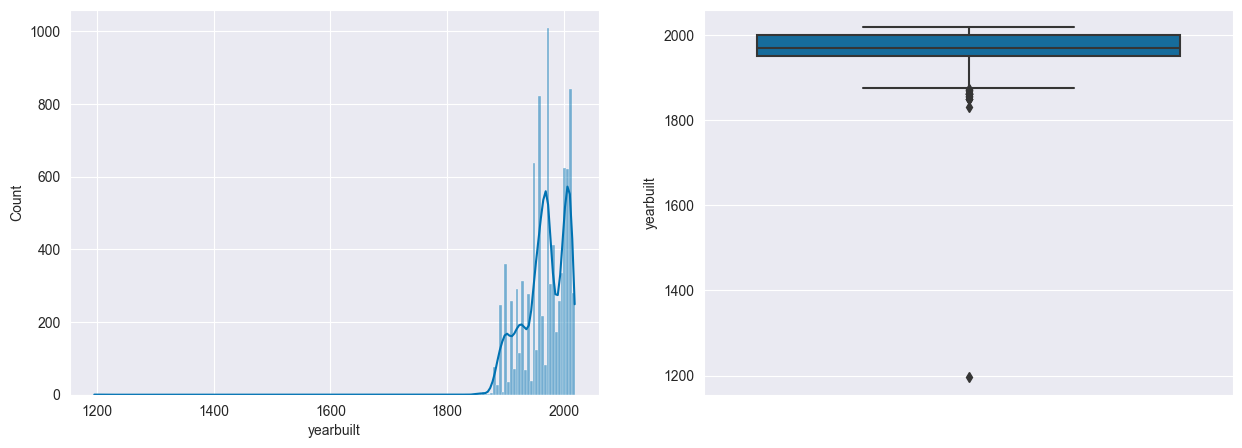

In [43]:
hist_box_describe_num(df, 'yearbuilt')

Есть выбросы
Можно считать выбросами объекты, год постройки которых старше 1875. Таких объектов ≈0.2%

count    8921.000000
mean     1966.271494
std        35.709928
min      1877.000000
25%      1950.000000
50%      1970.000000
75%      2000.000000
max      2018.000000
Name: yearbuilt, dtype: float64


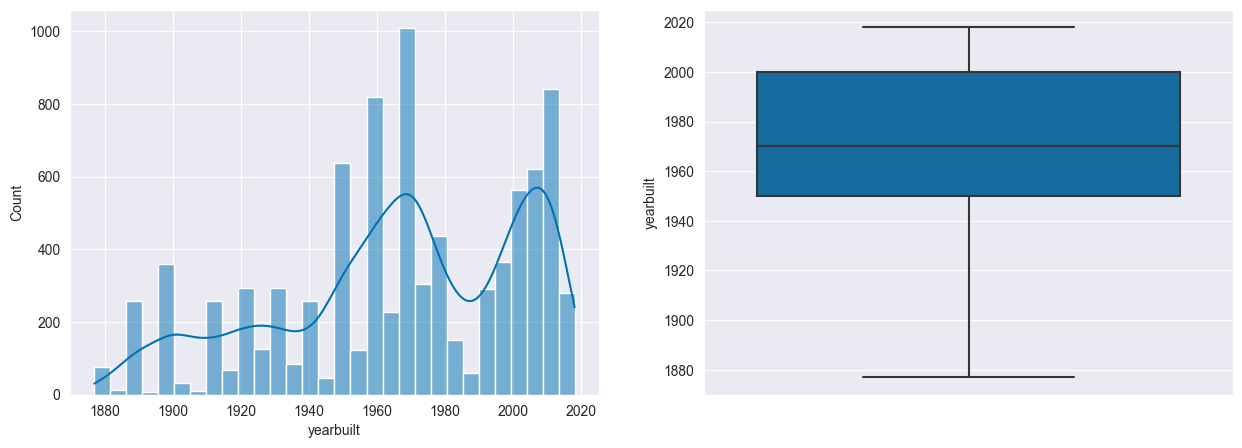

In [44]:
hist_box_describe_num(df.query('yearbuilt > 1875'), 'yearbuilt')

Большинство домов построены в период с 1950 по 2000 годы

### Lattitude - Широта

count    15041.000000
mean       -37.809872
std          0.081272
min        -38.182550
25%        -37.858180
50%        -37.803600
75%        -37.756100
max        -37.408530
Name: lattitude, dtype: float64


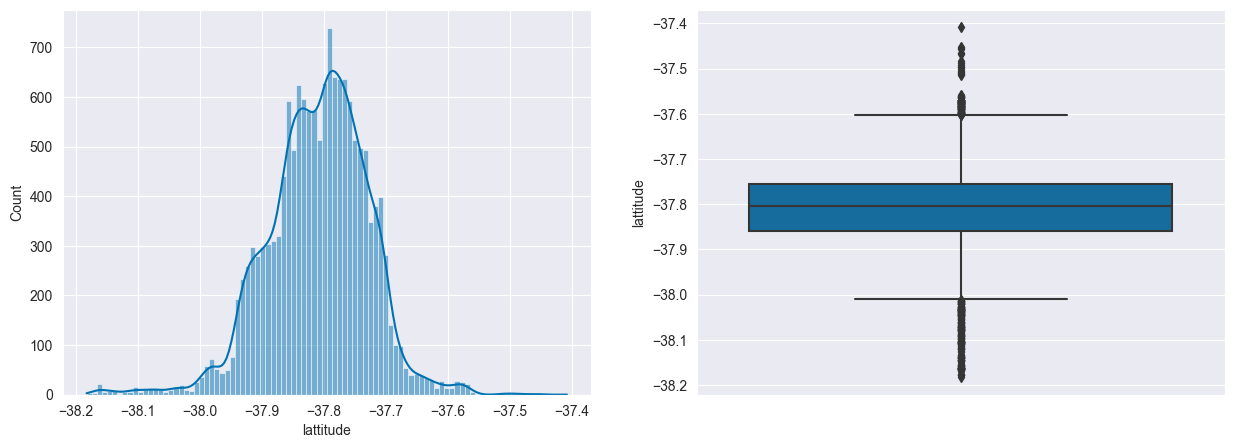

In [45]:
hist_box_describe_num(df, 'lattitude')

Дома чаще всего находятся между -38 и -37.6 широтой

### Longtitude - Долгота

count    15041.000000
mean       144.996486
std          0.106536
min        144.431810
25%        144.931400
50%        145.001100
75%        145.060190
max        145.526350
Name: longtitude, dtype: float64


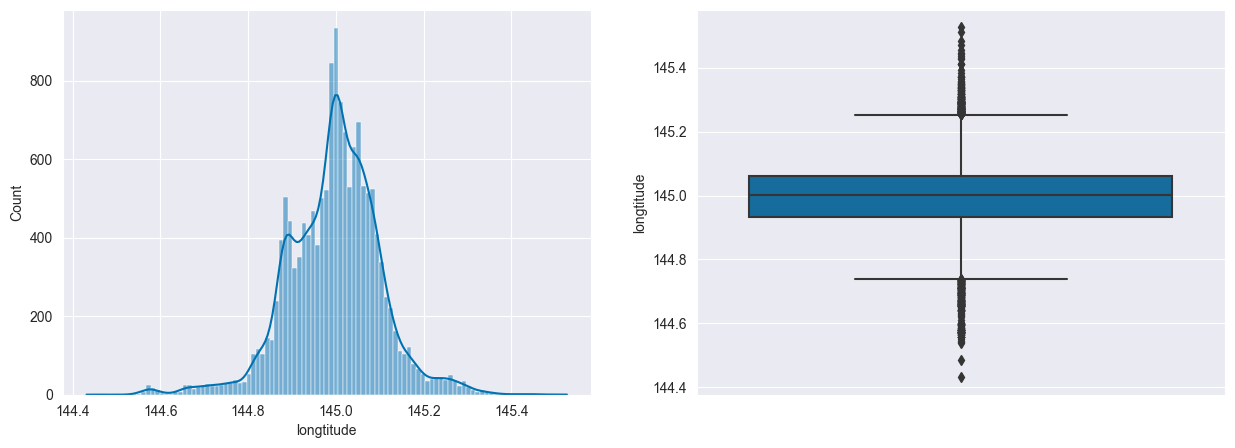

In [46]:
hist_box_describe_num(df, 'longtitude')

Большинство домов между 144.7 и 145.3 долготой

### Propertycount - Количество объектов недвижимости в одном районе

count    18372.000000
mean      7518.621489
std       4487.143499
min        249.000000
25%       4294.000000
50%       6567.000000
75%      10331.000000
max      21650.000000
Name: propertycount, dtype: float64


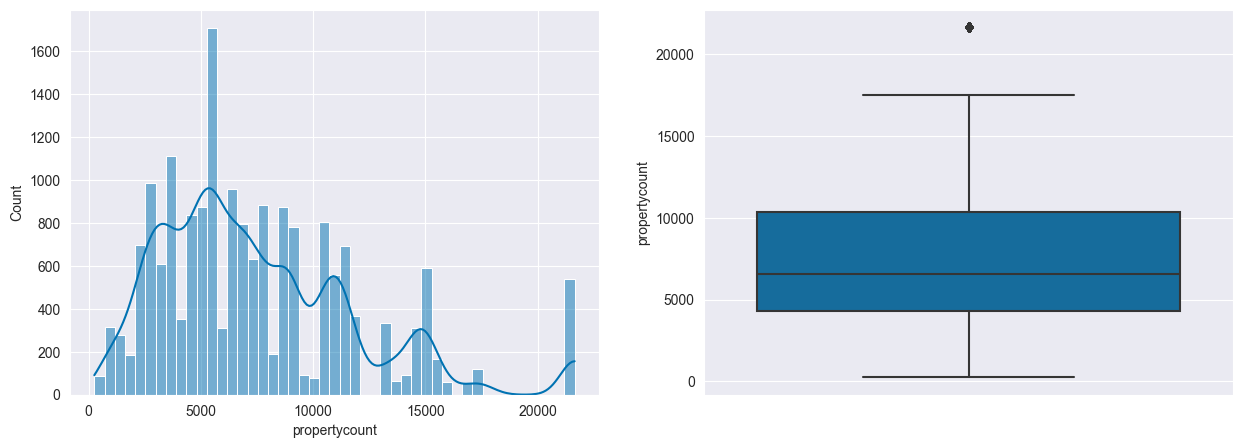

In [47]:
hist_box_describe_num(df, 'propertycount')

В одном районе может быть от 249 до 17 тысяч объектов недвижимости

### id

count    18373.000000
mean     17490.731889
std      10075.864589
min          2.000000
25%       8749.000000
50%      17497.000000
75%      26286.000000
max      34856.000000
Name: id, dtype: float64


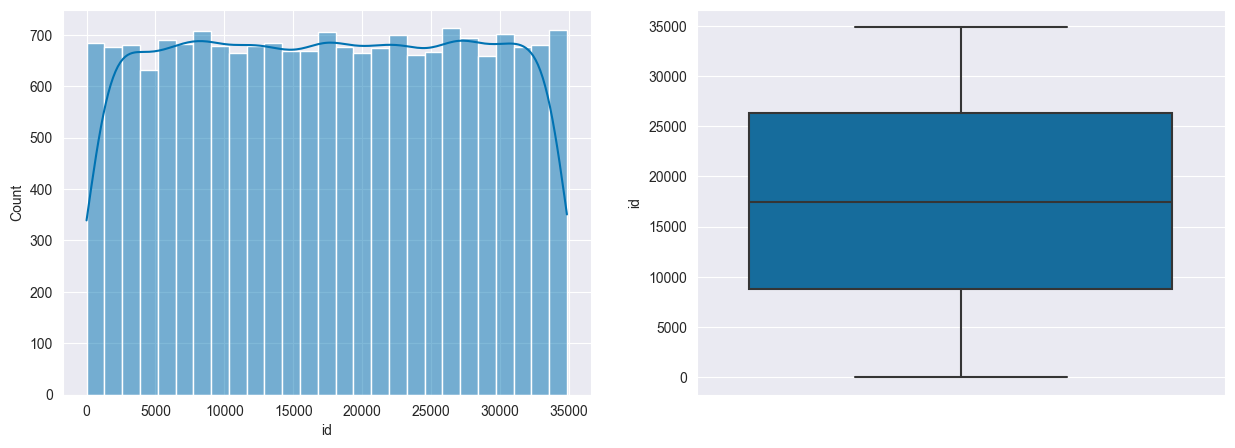

In [48]:
hist_box_describe_num(df, 'id')

id расположены равномерно от 2 до ≈35000

## Категориальные признаки

In [49]:
df.describe(include='object').T

,count,unique,top,freq
suburb,18373,329,Reservoir,540
address,18373,18112,28 Blair St,3
type,18373,3,h,12091
method,18373,5,S,12025
sellerg,18373,305,Nelson,2001
councilarea,18372,33,Boroondara City Council,1896
regionname,18372,8,Southern Metropolitan,6326


#### Функция для категориальных признаков

In [50]:
def describe_cat(ds, x):
    print('Number of unique values:', ds[x].nunique())
    print(ds[x].value_counts())

#### Suburb - Район (микрорайон)

In [51]:
describe_cat(df, 'suburb')

Number of unique values: 329
Reservoir         540
Bentleigh East    368
Richmond          333
Preston           312
Brunswick         285
                 ... 
Wonga Park          1
Upwey               1
Bacchus Marsh       1
Rockbank            1
Monbulk             1
Name: suburb, Length: 329, dtype: int64


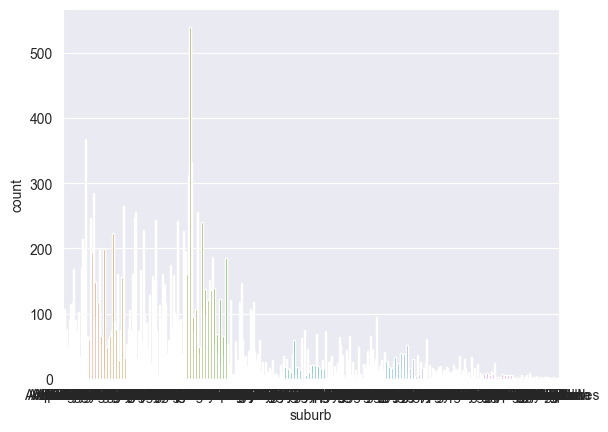

In [52]:
sns.countplot(data=df, x='suburb');

Т.к. районов более 300, сложно их обобщить

Топ 5 дорогих микрорайонов:

In [53]:
df.groupby('suburb').price.median().sort_values(ascending=False).head()

suburb
Canterbury     1992500.0
Albert Park    1875000.0
Middle Park    1850000.0
Camberwell     1845000.0
Balwyn         1800000.0
Name: price, dtype: float64

Топ 5 дешёвых микрорайонов:

In [54]:
df.groupby('suburb').price.median().sort_values().head()

suburb
Bacchus Marsh     285000.0
Rockbank          340000.0
Kurunjang         353500.0
Werribee South    355000.0
Wallan            366000.0
Name: price, dtype: float64

### Type - Тип дома

In [55]:
describe_cat(df, 'type')

Number of unique values: 3
h    12091
u     4275
t     2007
Name: type, dtype: int64


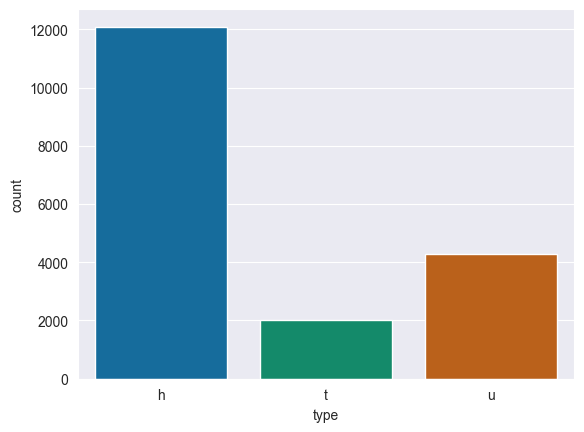

In [56]:
sns.countplot(data=df, x='type');

Больше всего домов типа h - дома, виллы, коттеджи. В середине u - дуплексы. Меньше всего t - таунхаусы.

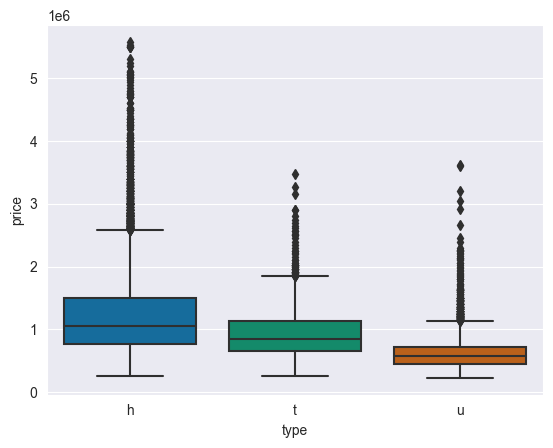

In [57]:
sns.boxplot(data=df, x='type', y='price');

Самые дорогие - h (коттеджи), дешевле - t (таунхаусы), самые дешёвые - u (дуплексы)

### Method - метод продажи

In [58]:
describe_cat(df, 'method')

Number of unique values: 5
S     12025
SP     2353
PI     2179
VB     1688
SA      128
Name: method, dtype: int64


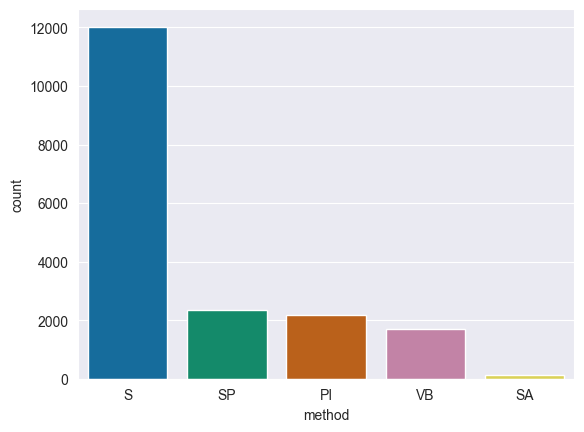

In [59]:
sns.countplot(data=df, x='method');

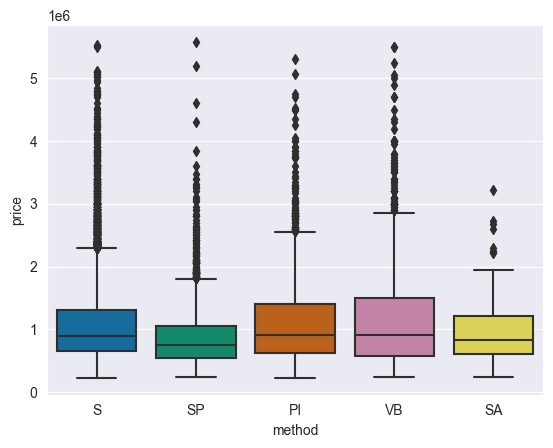

In [60]:
sns.boxplot(data=df, x='method', y='price');

Всего 5 вариантов продажи, больше всего было продано с помощью S - обычная продажа

### SellerG - Агент по недвижимости

In [61]:
describe_cat(df, 'sellerg')

Number of unique values: 305
Nelson           2001
Jellis           1756
hockingstuart    1579
Barry            1392
Ray              1033
                 ... 
Zahn                1
Homes               1
Allan               1
Steveway            1
Point               1
Name: sellerg, Length: 305, dtype: int64


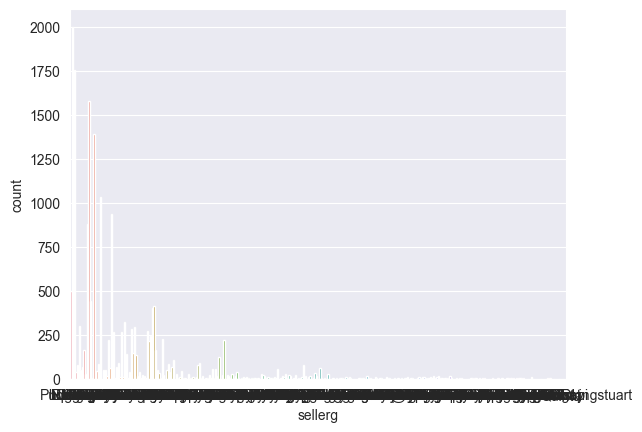

In [62]:
sns.countplot(data=df, x='sellerg');

Всего 305 агентов недвижимости. Лучшие из них продали более 1000 объектов

### CouncilArea - Округа

In [63]:
describe_cat(df, 'councilarea')

Number of unique values: 33
Boroondara City Council           1896
Darebin City Council              1714
Moreland City Council             1335
Glen Eira City Council            1251
Moonee Valley City Council        1161
Melbourne City Council            1159
Banyule City Council               947
Maribyrnong City Council           898
Brimbank City Council              874
Bayside City Council               857
Port Phillip City Council          729
Yarra City Council                 683
Stonnington City Council           674
Monash City Council                640
Hobsons Bay City Council           601
Manningham City Council            558
Hume City Council                  481
Kingston City Council              410
Whittlesea City Council            303
Whitehorse City Council            237
Wyndham City Council               188
Maroondah City Council             165
Knox City Council                  138
Frankston City Council             114
Melton City Council                1

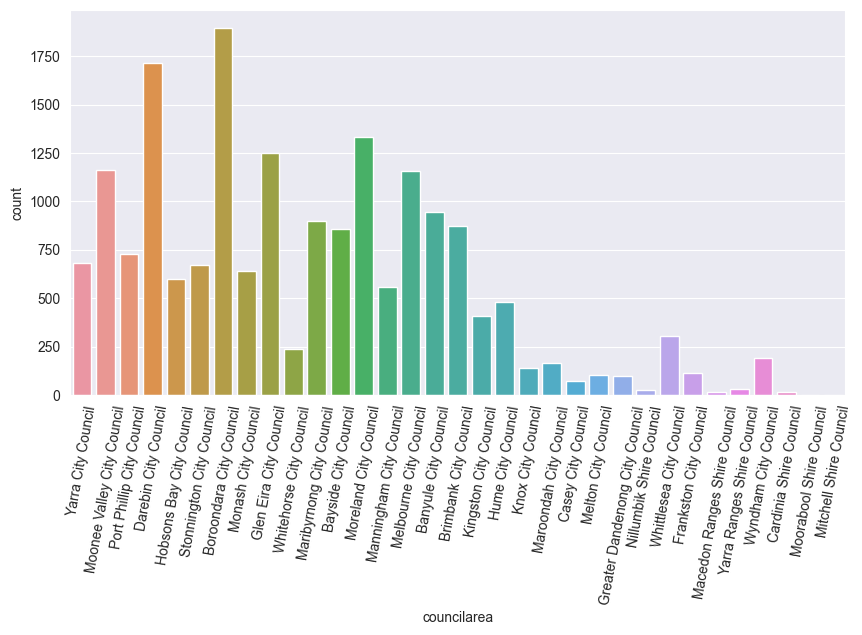

In [64]:
plt.figure(figsize=(10, 5))
plt.xticks(rotation=80)
sns.countplot(data=df, x='councilarea');

Всего 33 округа, количество домов расположено неравномерно

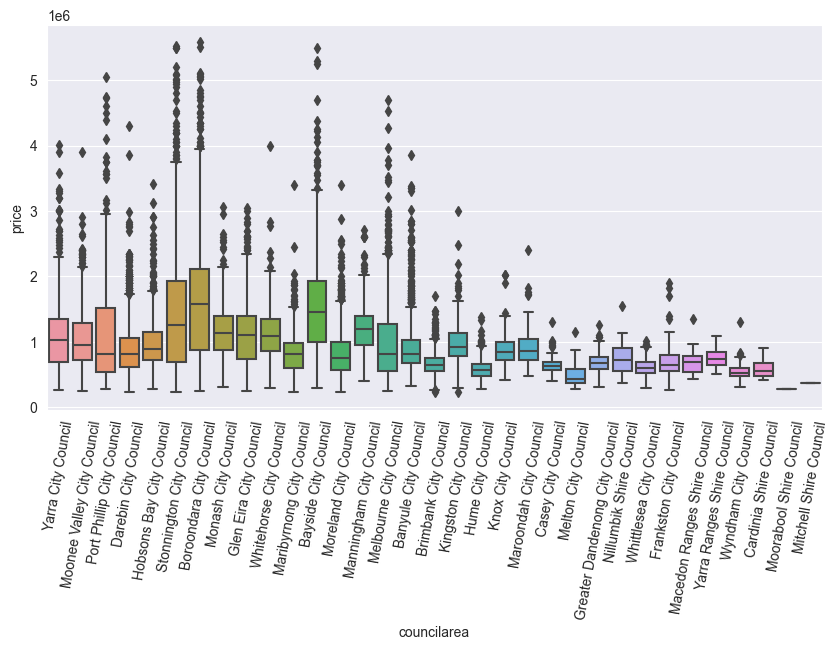

In [65]:
plt.figure(figsize=(10, 5))
plt.xticks(rotation=80)
sns.boxplot(data=df, x='councilarea', y='price');

Некоторые округа сильно дороже других

Топ 5 дорогих округов:

In [66]:
df.groupby('councilarea').price.median().sort_values(ascending=False).head(5)

councilarea
Boroondara City Council     1581000.0
Bayside City Council        1450000.0
Stonnington City Council    1254000.0
Manningham City Council     1200000.0
Monash City Council         1133000.0
Name: price, dtype: float64

Топ 5 дешёвых округов:

In [67]:
df.groupby('councilarea').price.median().sort_values().head()

councilarea
Moorabool Shire Council    285000.0
Mitchell Shire Council     366000.0
Melton City Council        430000.0
Wyndham City Council       530000.0
Cardinia Shire Council     559000.0
Name: price, dtype: float64

### Regionname - Административное деление (Запад, Северо-запад и т.д.)

In [68]:
describe_cat(df, 'regionname')

Number of unique values: 8
Southern Metropolitan         6326
Northern Metropolitan         5305
Western Metropolitan          3875
Eastern Metropolitan          1999
South-Eastern Metropolitan     683
Eastern Victoria                79
Northern Victoria               63
Western Victoria                42
Name: regionname, dtype: int64


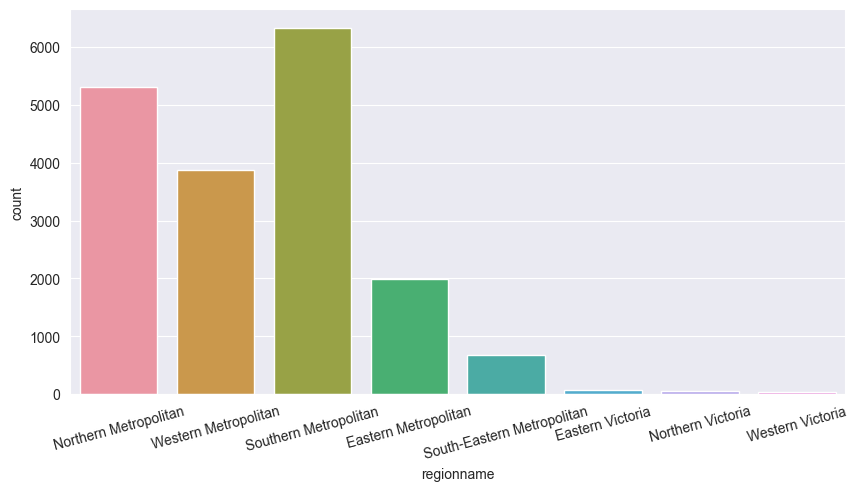

In [69]:
plt.figure(figsize=(10, 5))
plt.xticks(rotation=15)
sns.countplot(data=df, x='regionname');

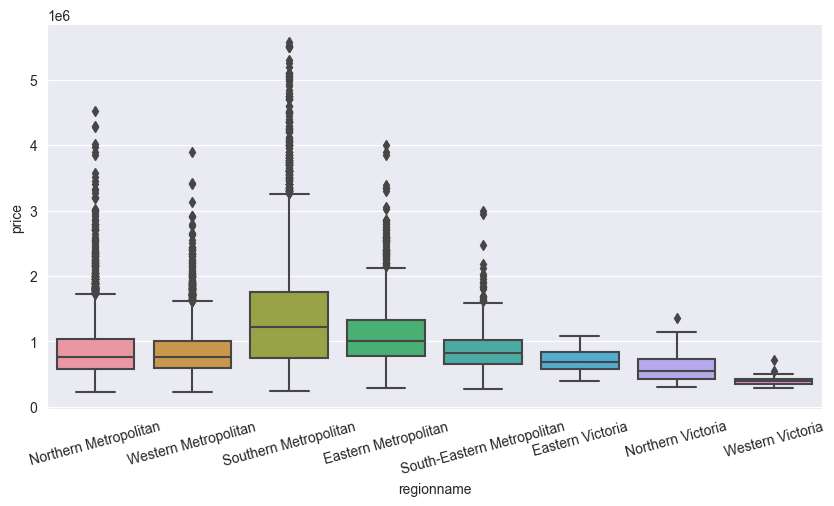

In [70]:
plt.figure(figsize=(10, 5))
plt.xticks(rotation=15)
sns.boxplot(data=df, x='regionname', y='price');

Всего 8 Административных округов. В округе Southern Metropolitan продаётся самая дорогая недвижимость

Топ 5 дорогих Административных округов:

In [71]:
df.groupby('regionname').price.median().sort_values(ascending=False).head()

regionname
Southern Metropolitan         1225000.0
Eastern Metropolitan          1000500.0
South-Eastern Metropolitan     815000.0
Northern Metropolitan          765000.0
Western Metropolitan           765000.0
Name: price, dtype: float64

Топ 5 дешёвых Административных округов:

In [72]:
df.groupby('regionname').price.median().sort_values().head()

regionname
Western Victoria         388750.0
Northern Victoria        547000.0
Eastern Victoria         689000.0
Northern Metropolitan    765000.0
Western Metropolitan     765000.0
Name: price, dtype: float64

# 6. Preprocessing

In [73]:
df.isna().mean().sort_values(ascending=False)

buildingarea     0.578185
yearbuilt        0.513199
landsize         0.260926
car              0.194579
bathroom         0.188864
bedroom2         0.188755
longtitude       0.181353
lattitude        0.181353
propertycount    0.000054
regionname       0.000054
councilarea      0.000054
suburb           0.000000
address          0.000000
postcode         0.000000
distance         0.000000
date             0.000000
sellerg          0.000000
method           0.000000
price            0.000000
type             0.000000
rooms            0.000000
id               0.000000
dtype: float64

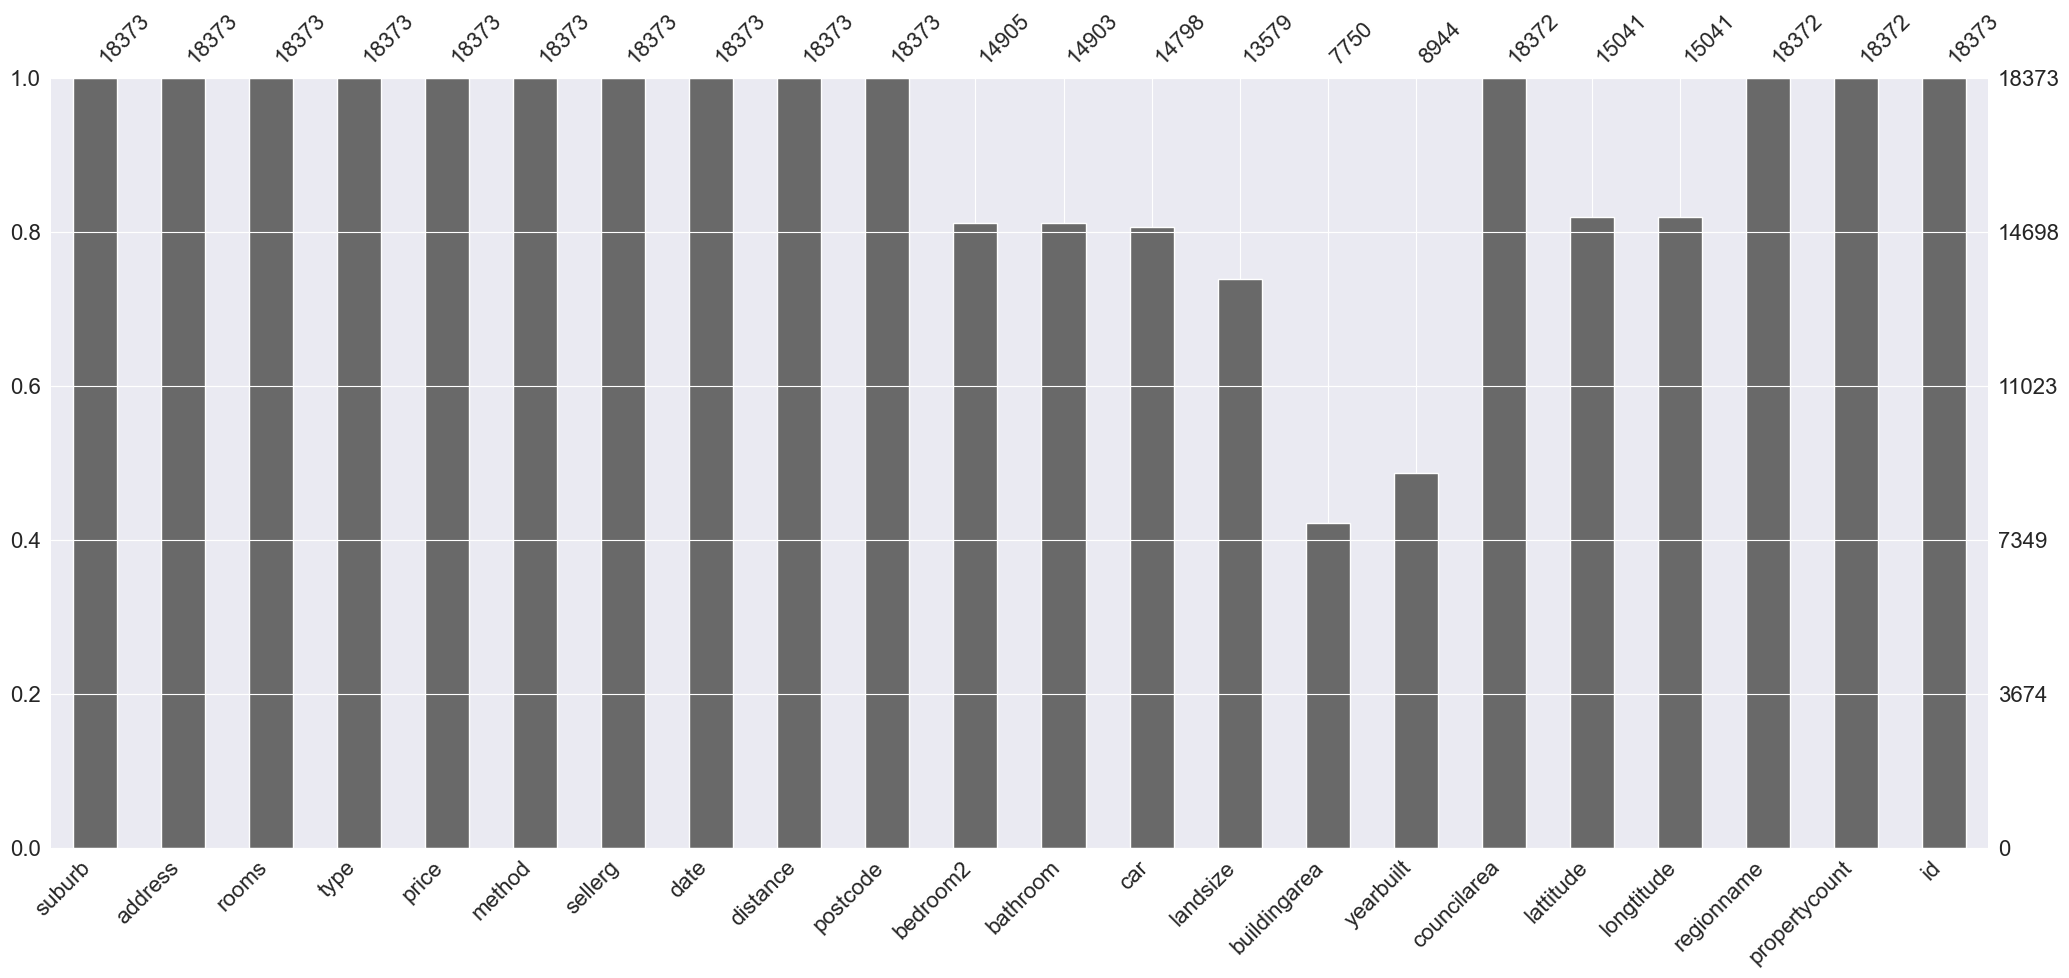

In [74]:
msno.bar(df);

Больше всего пропусков df в buildingarea, yearbuilt и landsize

In [75]:
df_test.isna().mean().sort_values(ascending=False)

buildingarea     0.673169
yearbuilt        0.647086
landsize         0.504990
car              0.366977
bathroom         0.336131
bedroom2         0.335677
longtitude       0.330007
lattitude        0.330007
propertycount    0.000227
regionname       0.000227
councilarea      0.000227
distance         0.000113
postcode         0.000113
suburb           0.000000
address          0.000000
date             0.000000
sellerg          0.000000
method           0.000000
type             0.000000
rooms            0.000000
id               0.000000
dtype: float64

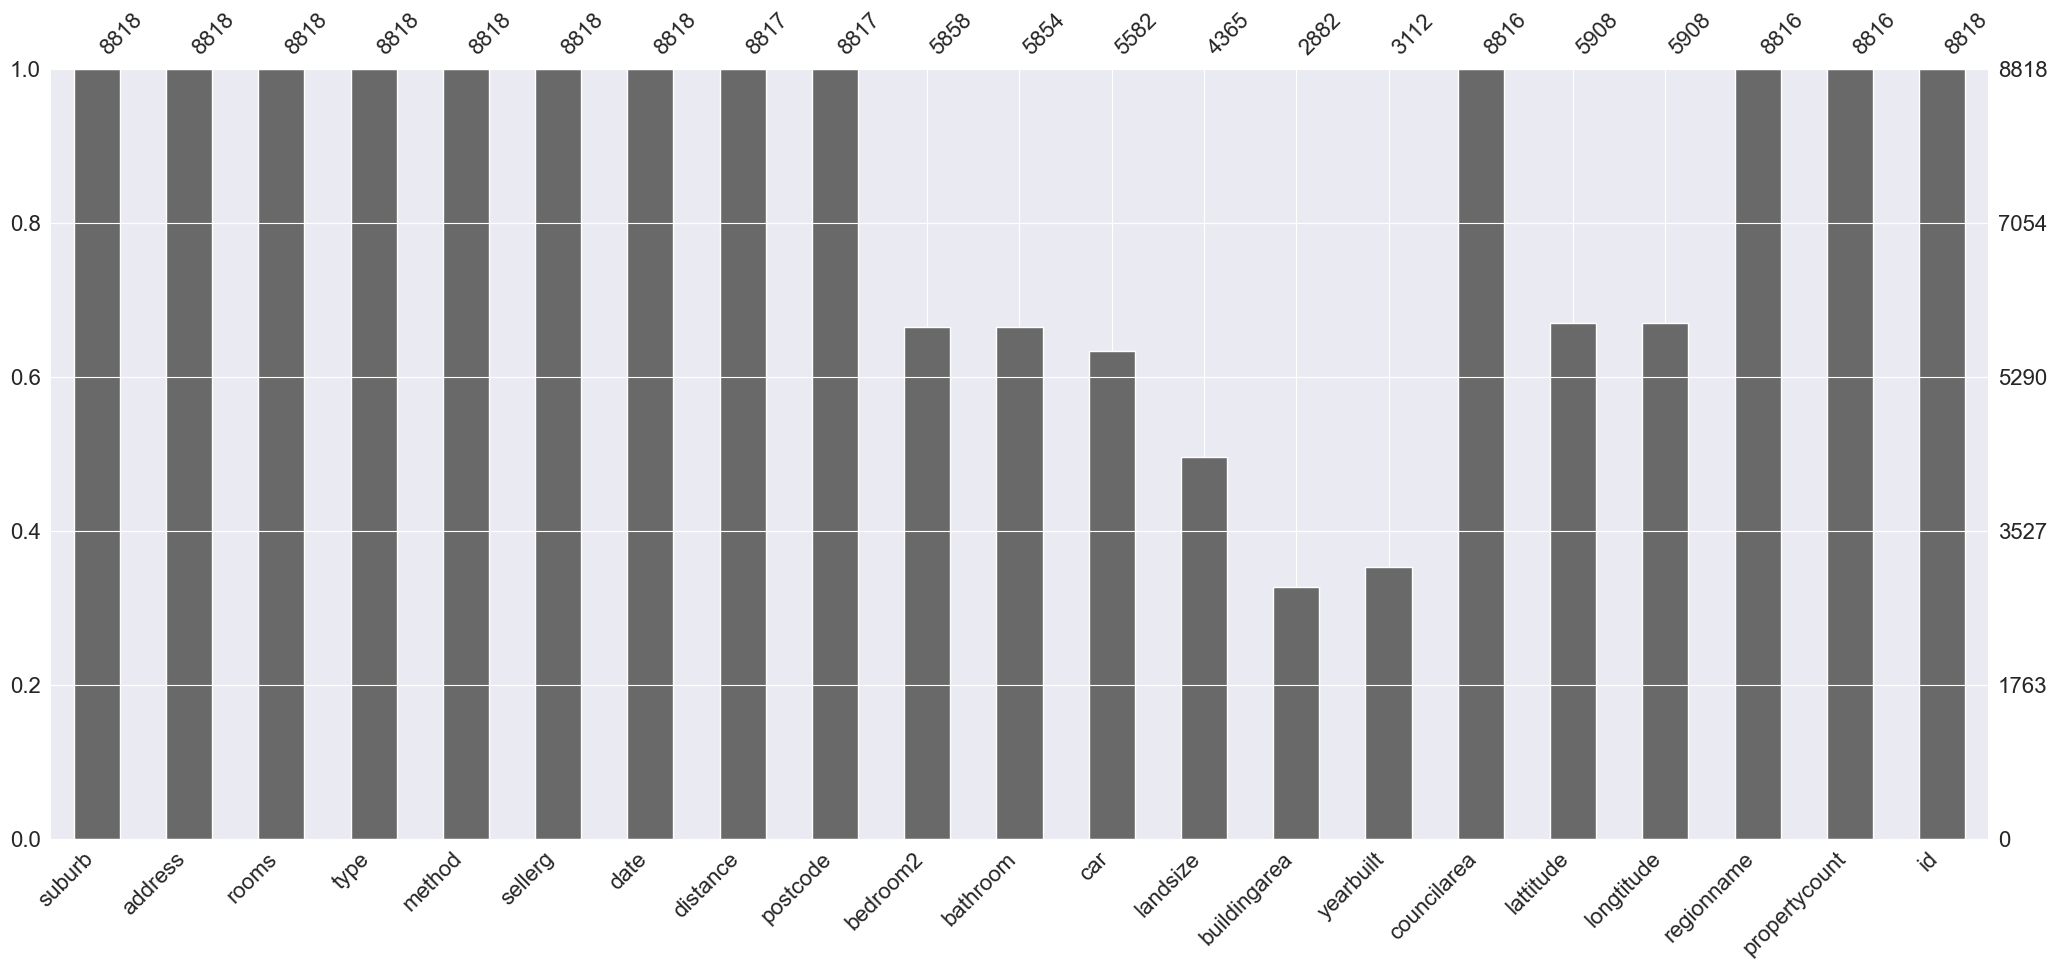

In [76]:
msno.bar(df_test);

Больше всего пропусков в тестовых данных тоже в buildingarea, yearbuilt, landside.
В тестовом датасете больше пропусков

## Список всех фич

In [77]:
X = [i for i in df.columns]
X.remove('price')
cat_features = [i for i in df.columns if df[i].dtype == 'object']
y = ['price']

In [78]:
X

['suburb',
 'address',
 'rooms',
 'type',
 'method',
 'sellerg',
 'date',
 'distance',
 'postcode',
 'bedroom2',
 'bathroom',
 'car',
 'landsize',
 'buildingarea',
 'yearbuilt',
 'councilarea',
 'lattitude',
 'longtitude',
 'regionname',
 'propertycount',
 'id']

In [79]:
cat_features

['suburb', 'address', 'type', 'method', 'sellerg', 'councilarea', 'regionname']

## Заполнение пропусков

Воспользуюсь инструментом RandomSampleImputer из библиотеки feature-engine
Начну с тренировочных (обучающих данных)

In [80]:
random_inputer = RandomSampleImputer(variables=['bedroom2', 'bathroom', 'car', 'landsize', 'buildingarea', 'yearbuilt', 'lattitude', 'longtitude', 'propertycount', 'councilarea', 'regionname'])
random_inputer.fit(df)

RandomSampleImputer(variables=['bedroom2', 'bathroom', 'car', 'landsize',
                               'buildingarea', 'yearbuilt', 'lattitude',
                               'longtitude', 'propertycount', 'councilarea',
                               'regionname'])

In [81]:
df = random_inputer.transform(df)

In [82]:
df.isna().mean().sort_values(ascending=False)

suburb           0.0
address          0.0
propertycount    0.0
regionname       0.0
longtitude       0.0
lattitude        0.0
councilarea      0.0
yearbuilt        0.0
buildingarea     0.0
landsize         0.0
car              0.0
bathroom         0.0
bedroom2         0.0
postcode         0.0
distance         0.0
date             0.0
sellerg          0.0
method           0.0
price            0.0
type             0.0
rooms            0.0
id               0.0
dtype: float64

Пропусков в обучающей выборке больше нет.
Теперь проделаю тоже самое с тестовой выборкой.

In [83]:
random_inputer = RandomSampleImputer(variables=['bedroom2', 'bathroom', 'car', 'landsize', 'buildingarea', 'yearbuilt', 'lattitude', 'longtitude', 'propertycount', 'councilarea', 'regionname', 'distance', 'postcode'])
random_inputer.fit(df_test)

RandomSampleImputer(variables=['bedroom2', 'bathroom', 'car', 'landsize',
                               'buildingarea', 'yearbuilt', 'lattitude',
                               'longtitude', 'propertycount', 'councilarea',
                               'regionname', 'distance', 'postcode'])

In [84]:
df_test = random_inputer.transform(df_test)

In [85]:
df_test.isna().mean().sort_values(ascending=False)

suburb           0.0
car              0.0
propertycount    0.0
regionname       0.0
longtitude       0.0
lattitude        0.0
councilarea      0.0
yearbuilt        0.0
buildingarea     0.0
landsize         0.0
bathroom         0.0
address          0.0
bedroom2         0.0
postcode         0.0
distance         0.0
date             0.0
sellerg          0.0
method           0.0
type             0.0
rooms            0.0
id               0.0
dtype: float64

Пропусков в тестовой выборке больше нет

## Удаление выбросов

### Landsize - прилегающая территория

count     18373.000000
mean        544.852174
std        3464.352306
min           0.000000
25%         176.000000
50%         440.000000
75%         650.000000
max      433014.000000
Name: landsize, dtype: float64


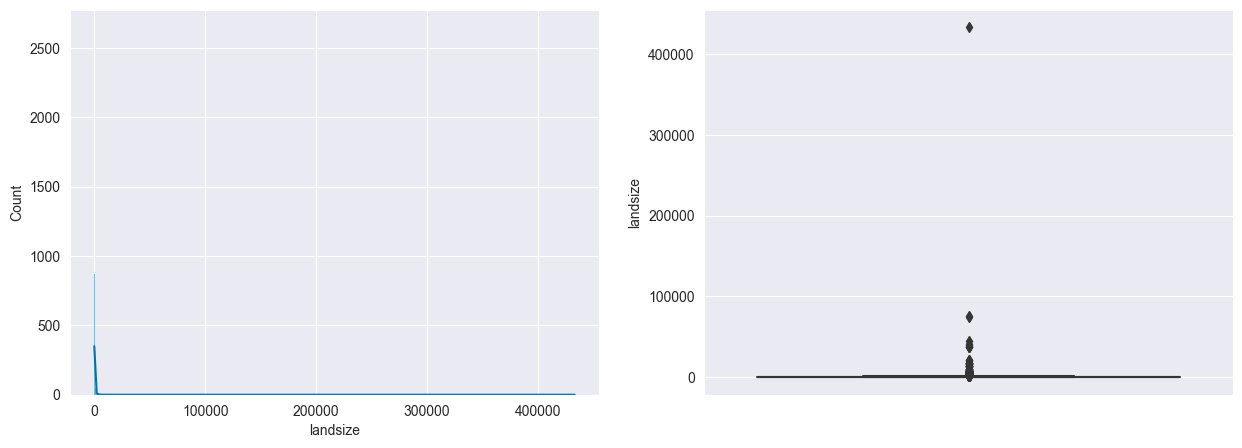

In [86]:
hist_box_describe_num(df, 'landsize')

Сокращу прилегающую территорию до 1300. Это действие удалит ≈ 3% данных в текущей выборке

In [87]:
df = df.query('landsize < 1300')

count    17844.000000
mean       412.647669
std        285.341982
min          0.000000
25%        170.000000
50%        415.000000
75%        639.000000
max       1294.000000
Name: landsize, dtype: float64


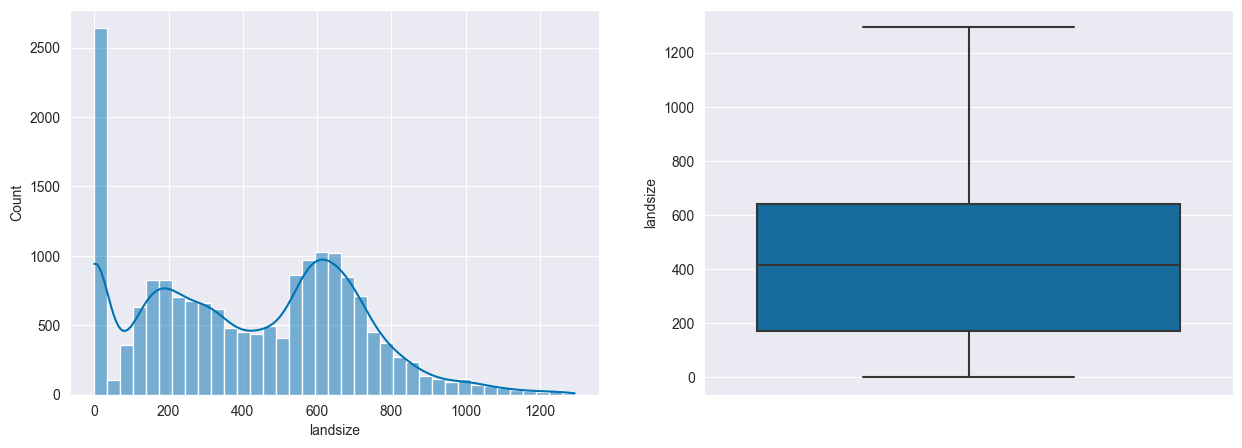

In [88]:
hist_box_describe_num(df, 'landsize')

### YearBuilt - Год постройки

count    17844.000000
mean      1965.585127
std         36.953256
min       1196.000000
25%       1945.000000
50%       1970.000000
75%       2000.000000
max       2018.000000
Name: yearbuilt, dtype: float64


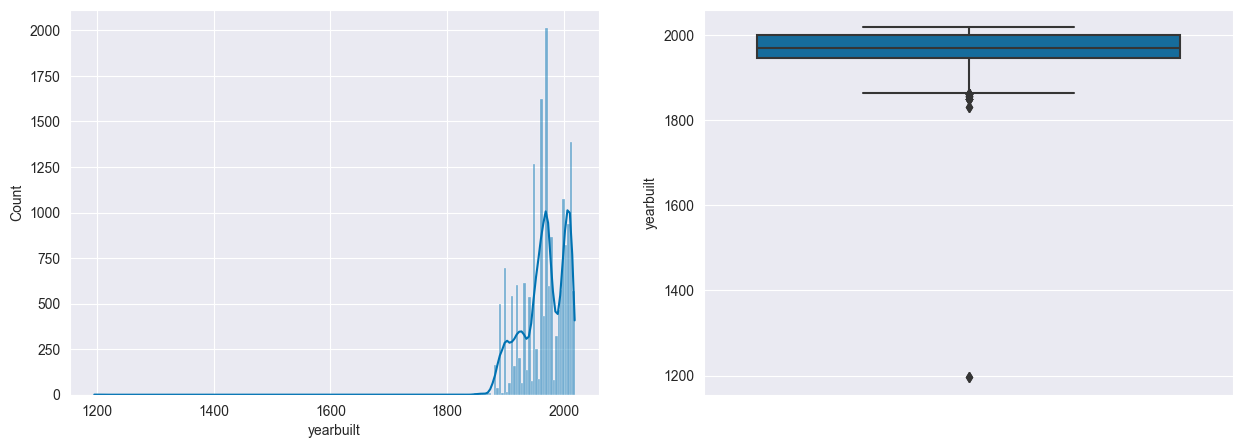

In [89]:
hist_box_describe_num(df, 'yearbuilt')

Сокращу год постройки с 1875 по 2018. Это действие удалит ≈ 0.3% данных от текущей выборки.

In [90]:
df = df.query('yearbuilt > 1875')

count    17800.00000
mean      1965.91927
std         35.72078
min       1877.00000
25%       1948.00000
50%       1970.00000
75%       2000.00000
max       2018.00000
Name: yearbuilt, dtype: float64


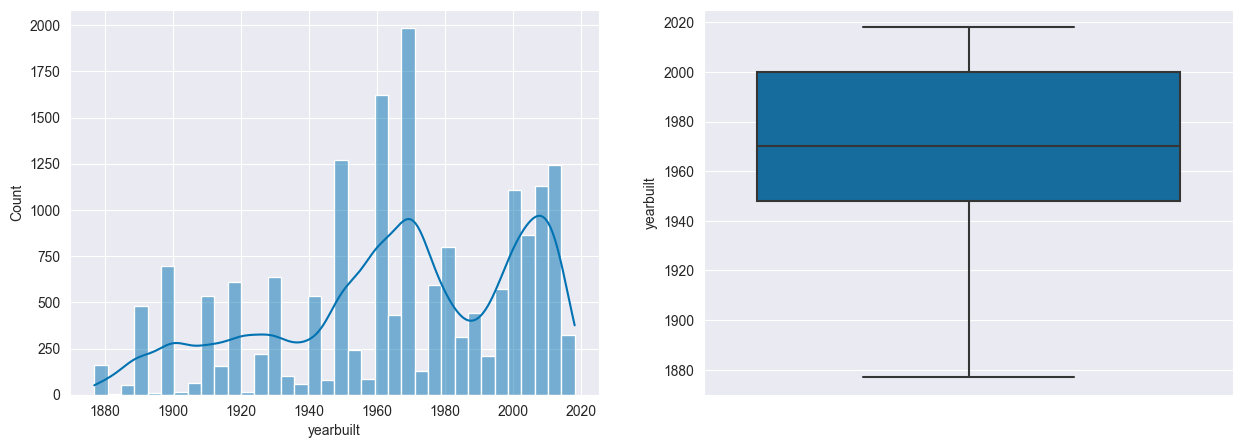

In [91]:
hist_box_describe_num(df, 'yearbuilt')

### BuildingArea - Площадь дома

count    17800.000000
mean       152.541522
std        592.486675
min          0.000000
25%         92.000000
50%        125.000000
75%        173.000000
max      44515.000000
Name: buildingarea, dtype: float64


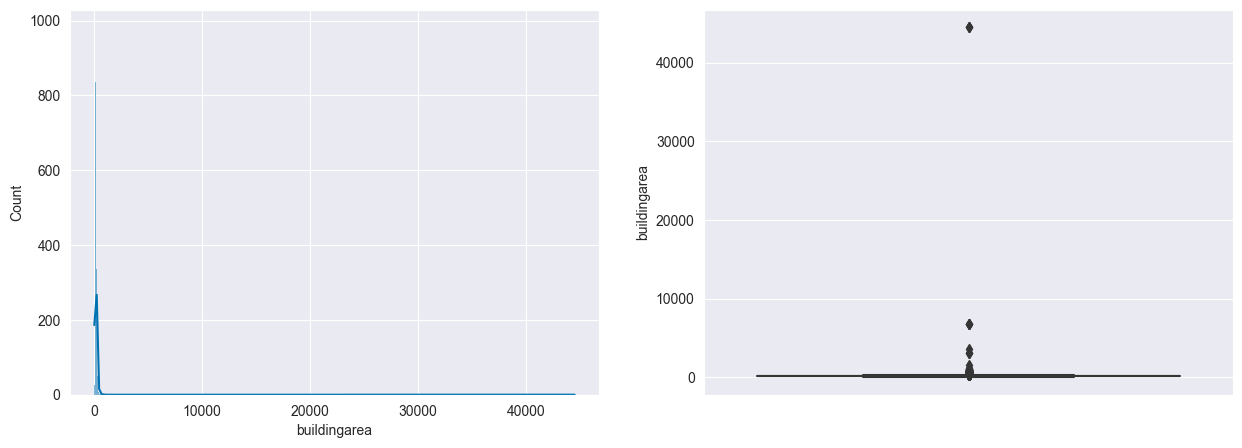

In [92]:
hist_box_describe_num(df, 'buildingarea')

Сокращу площадь дома до 500м². Это действие удалит ≈1% от текущей выборки

In [93]:
df = df.query('buildingarea < 500')

count    17654.000000
mean       138.993556
std         71.351028
min          0.000000
25%         92.000000
50%        124.450000
75%        171.000000
max        495.000000
Name: buildingarea, dtype: float64


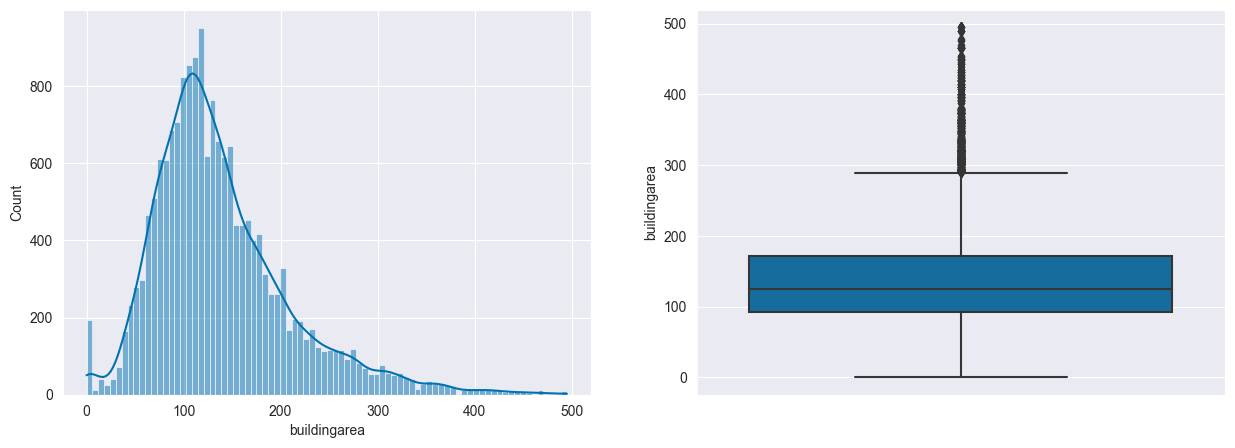

In [94]:
hist_box_describe_num(df, 'buildingarea')

### ИТОГ по выбросам

Суммарно было удалено 731 объекта из обучающей выборки размером в 18373 объекта, что составляет ≈4% от исходных данных.

# 7. Modeling

## Baseline Catboost

### Тренировочная и тестовая выборки

In [95]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

### Составляю список фич для модели

Ещё раз посмотрим на корреляцию фич, после заполнения пропусков и удаления выбросов

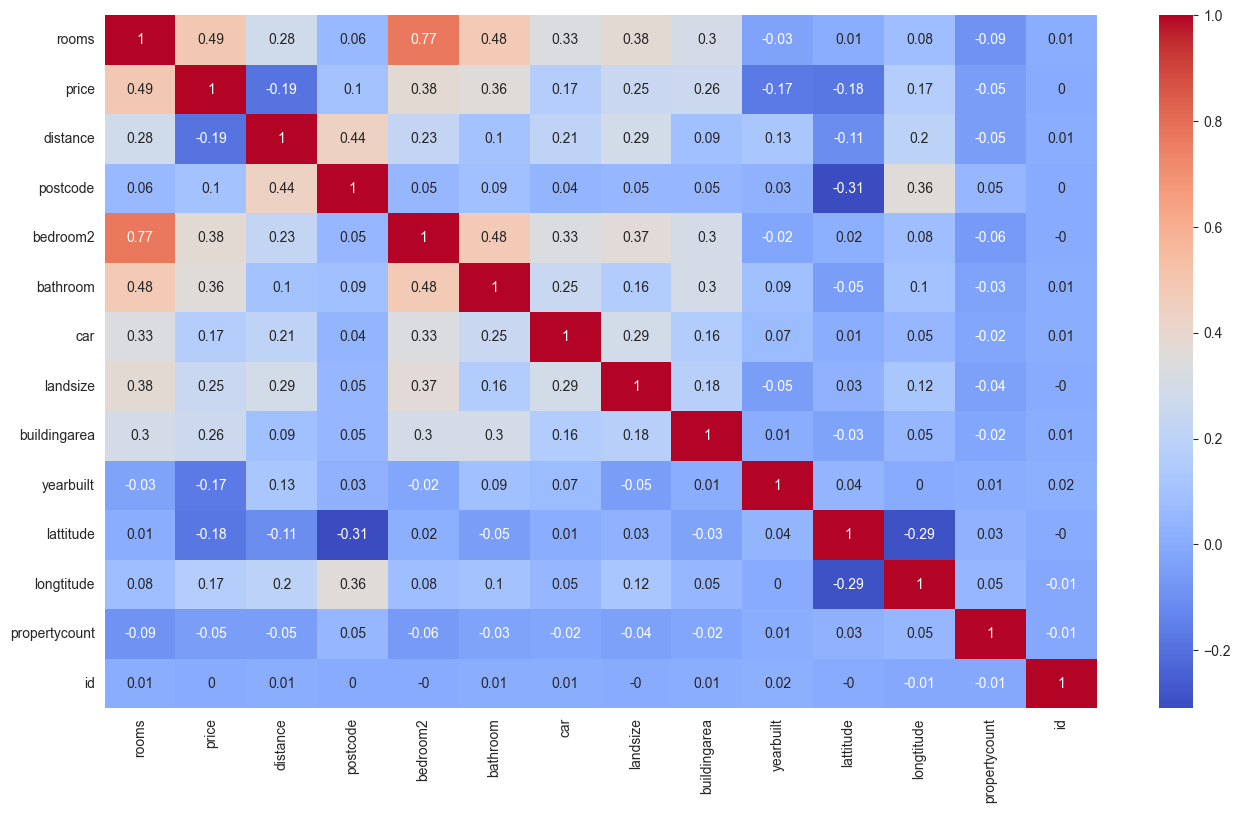

In [99]:
plt.figure(figsize=(16,9))
sns.heatmap(round(train.corr(),2),annot=True,cmap="coolwarm")
plt.show()

Проверим смарт корреляцией, стоит ли выкидывать какие-нибудь признаки в baseline модели

In [100]:
correlated = SmartCorrelatedSelection(
    variables= None,
    method = 'pearson',
    threshold = 0.8,
    missing_values = 'ignore',
    selection_method = 'variance',
    estimator=None,
    scoring = 'roc_auc',
    cv=5)

correlated.fit(train)

SmartCorrelatedSelection(cv=5, selection_method='variance')

Смарт корреляция не рекомендует конкретных столбцов к дропу

In [101]:
correlated.features_to_drop_

[]

Выведу все фичи, а так же cat_features и target отдельно

In [104]:
print(X, cat_features, y, sep='\n')

['suburb', 'address', 'rooms', 'type', 'method', 'sellerg', 'date', 'distance', 'postcode', 'bedroom2', 'bathroom', 'car', 'landsize', 'buildingarea', 'yearbuilt', 'councilarea', 'lattitude', 'longtitude', 'regionname', 'propertycount', 'id']
['suburb', 'address', 'type', 'method', 'sellerg', 'councilarea', 'regionname']
['price']


### Подготовлю данные для catboost`а

In [124]:
train_data = Pool(data=train[X], label=train[y], cat_features=cat_features)

Настраиваю гиперпараметры:

In [125]:
parameters = {'cat_features': cat_features,
              'learning_rate': 0.05,
              'eval_metric': 'MAPE',
              'loss_function': 'MAE',
              'random_seed': 42,
              'verbose':100}

### Кросс-валидация

In [126]:
%%time
cv_data = cv(
    params = parameters,
    pool = train_data,
    fold_count=5,
    shuffle=True,
    partition_random_seed=0,
    stratified=False,
    verbose=False
)

Training on fold [0/5]

bestTest = 0.1517075228
bestIteration = 999

Training on fold [1/5]

bestTest = 0.1502965796
bestIteration = 988

Training on fold [2/5]

bestTest = 0.1508739772
bestIteration = 955

Training on fold [3/5]

bestTest = 0.1526567645
bestIteration = 984

Training on fold [4/5]

bestTest = 0.1513382846
bestIteration = 976

CPU times: total: 12min 42s
Wall time: 2min 23s


In [127]:
cv_data

,iterations,test-MAPE-mean,test-MAPE-std,train-MAPE-mean,train-MAPE-std,test-MAE-mean,test-MAE-std,train-MAE-mean,train-MAE-std
0,0,0.946397,0.000594,0.946401,0.000086,1.005832e+06,20411.040623,1.005887e+06,4971.405737
1,1,0.895529,0.001504,0.895704,0.000147,9.612151e+05,20558.628906,9.613938e+05,4708.324327
2,2,0.846562,0.002395,0.846746,0.000117,9.217182e+05,20667.515542,9.219009e+05,4600.251384
3,3,0.800103,0.003064,0.800373,0.000202,8.834786e+05,20666.638006,8.837086e+05,4527.715112
4,4,0.755265,0.003697,0.755596,0.001297,8.455719e+05,20977.727188,8.458478e+05,5080.212038
...,...,...,...,...,...,...,...,...,...
995,995,0.151442,0.000860,0.122972,0.000863,1.688761e+05,5624.984185,1.425914e+05,1321.135586
996,996,0.151437,0.000859,0.122951,0.000858,1.688717e+05,5626.969490,1.425722e+05,1305.675578
997,997,0.151434,0.000858,0.122934,0.000860,1.688719e+05,5626.264471,1.425567e+05,1305.847375
998,998,0.151432,0.000853,0.122921,0.000858,1.688728e+05,5625.208031,1.425464e+05,1302.061581


### Нахождение наилучших параметров

In [128]:
cv_data['test-MAE-mean'].min()

168851.0163596525

In [129]:
cv_data[cv_data['test-MAE-mean'] == cv_data['test-MAE-mean'].min()]

,iterations,test-MAPE-mean,test-MAPE-std,train-MAPE-mean,train-MAPE-std,test-MAE-mean,test-MAE-std,train-MAE-mean,train-MAE-std
981,981,0.151401,0.000892,0.123248,0.000872,168851.01636,5581.668918,142885.20249,1343.802462


In [130]:
n_iters = cv_data[cv_data['test-MAE-mean'] == cv_data['test-MAE-mean'].min()]['iterations'].values[0]

Лучшая итерация:

In [131]:
n_iters

981

### Обучение на лучших параметрах

In [132]:
parameters = {'cat_features': cat_features,
              'learning_rate': 0.05,
              'iterations': n_iters,
              'eval_metric': 'MAPE',
              'loss_function': 'MAE',
              'random_seed': 42,
              'verbose':100}

In [133]:
model = CatBoostRegressor(**parameters)

In [134]:
model.fit(train_data)

0:	learn: 0.4098611	total: 36.6ms	remaining: 35.9s
100:	learn: 0.1695666	total: 3.27s	remaining: 28.5s
200:	learn: 0.1563672	total: 6.56s	remaining: 25.4s
300:	learn: 0.1479824	total: 9.6s	remaining: 21.7s
400:	learn: 0.1425774	total: 12.5s	remaining: 18s
500:	learn: 0.1383504	total: 15.7s	remaining: 15s
600:	learn: 0.1346737	total: 18.4s	remaining: 11.6s
700:	learn: 0.1319841	total: 21.2s	remaining: 8.45s
800:	learn: 0.1294681	total: 23.9s	remaining: 5.37s
900:	learn: 0.1271846	total: 26.6s	remaining: 2.36s
980:	learn: 0.1254252	total: 28.8s	remaining: 0us


### Просмотр результатов

In [135]:
joblib.dump(model, 'catboost5.pkl', compress=9)

['catboost5.pkl']

In [136]:
model_pkl = joblib.load('catboost5.pkl')

In [137]:
test['predict'] = model_pkl.predict(test[X])

In [138]:
test.head()

,suburb,address,rooms,type,price,method,sellerg,date,distance,postcode,bedroom2,bathroom,car,landsize,buildingarea,yearbuilt,councilarea,lattitude,longtitude,regionname,propertycount,id,predict
16899,Camberwell,32 Regent St,4,h,2600000.0,PI,Marshall,2017-08-19,7.7,3124.0,4.0,3.0,2.0,189.0,224.0,1935.0,Boroondara City Council,-37.84373,145.09277,Southern Metropolitan,8920.0,30567,2.343501e+06
2659,Coburg North,25 Spectrum Wy,4,h,1180000.0,S,Nelson,2017-03-04,9.2,3058.0,3.0,1.0,2.0,372.0,120.0,1930.0,Darebin City Council,-37.74470,144.87030,Northern Metropolitan,3445.0,17709,9.297206e+05
10832,Abbotsford,6/205 Gipps St,2,u,870000.0,S,Biggin,2017-05-20,2.5,3067.0,2.0,2.0,1.0,0.0,86.0,2013.0,Yarra City Council,-37.80550,144.99610,Northern Metropolitan,4019.0,24336,7.214613e+05
1121,Bentleigh East,1A Brian St,4,t,1185000.0,S,hockingstuart,2016-12-10,13.9,3165.0,4.0,2.0,2.0,305.0,207.0,2012.0,Glen Eira City Council,-37.92450,145.05070,Southern Metropolitan,10969.0,13328,1.145503e+06
13304,Mount Waverley,1/2 Gwynne St,2,u,670000.0,S,McGrath,2017-05-27,14.2,3149.0,2.0,1.0,1.0,296.0,243.0,1975.0,Monash City Council,-37.87128,145.13051,Eastern Metropolitan,13366.0,871,7.434547e+05


Напишу функцию для ошибки

In [139]:
def error(y_true, y_pred):
    print(mean_absolute_error(y_true, y_pred))
    print(mean_absolute_percentage_error(y_true, y_pred))

Посмотрю ошибку на 80% обучающих данных

In [140]:
error(test['price'], test['predict'])

170225.4399537928
0.15185462955517653


149691.90450363138
0.12988072481328633

### Обучение на ВСЕХ данных

In [141]:
parameters = {'cat_features': cat_features,
              'learning_rate': 0.05,
              'iterations': n_iters,
              'eval_metric': 'MAPE',
              'loss_function': 'MAE',
              'random_seed': 42,
              'verbose':100}

In [142]:
model = CatBoostRegressor(**parameters)

In [143]:
train_full_data = Pool(df[X], label=df[y], cat_features=cat_features)

In [144]:
model.fit(train_full_data)

0:	learn: 0.4088033	total: 29.8ms	remaining: 29.2s
100:	learn: 0.1701534	total: 3.5s	remaining: 30.5s
200:	learn: 0.1569406	total: 6.75s	remaining: 26.2s
300:	learn: 0.1486615	total: 9.89s	remaining: 22.3s
400:	learn: 0.1434747	total: 13.1s	remaining: 19s
500:	learn: 0.1394726	total: 16.8s	remaining: 16.1s
600:	learn: 0.1362749	total: 19.9s	remaining: 12.6s
700:	learn: 0.1337443	total: 23.4s	remaining: 9.35s
800:	learn: 0.1314010	total: 26.5s	remaining: 5.96s
900:	learn: 0.1293267	total: 29.9s	remaining: 2.65s
980:	learn: 0.1280650	total: 33s	remaining: 0us


In [146]:
model.predict(df_test[X])

array([1141588.13165606,  997648.34886768, 1345641.06347495, ...,
        571482.37250712,  625001.88836512,  756596.18650823])

array([ 905988.11973771, 1513215.46080538, 1428664.36897658, ...,
        656743.09913274, 1183115.18340337,  846622.56866999])

In [147]:
y_pred = model.predict(df_test[X])

### Сохранение в csv

In [148]:
submission = pd.DataFrame(df_test['id'])
submission['Price'] = y_pred
submission.to_csv('Catboost_CV_BASELINE_LF-MAE_LR_005.csv', index=False)

In [149]:
submission.head()

,id,Price
0,30130,9.059881e+05
1,18311,1.513215e+06
2,18934,1.428664e+06
3,1824,8.078372e+05
4,31339,9.034344e+05
